

# Step 1: Data Preprocessing 





* The code performs a series of data preprocessing steps to prepare a dataset for sentiment analysis and predictive modeling. The task involves cleaning, transforming, and balancing the dataset, splitting it into training and testing subsets. The following outlines the process in detail:

* Initially, the required libraries are imported, including pandas and numpy for data manipulation, train_test_split from scikit-learn for splitting the dataset, ADASYN from imbalanced-learn for oversampling, and LabelEncoder for encoding categorical labels.

* The dataset is read from a CSV file using pandas, and specific columns of interest are selected. These columns include 'reviews.rating', 'reviews.text', 'reviews.title', and 'reviews.doRecommend', which are relevant for constructing features and labels.

* The 'reviews.text' and 'reviews.title' columns are concatenated to handle missing values and construct a combined text feature. Missing values in these columns are replaced with empty strings before concatenation. Additionally, missing values in the 'reviews.doRecommend' column are replaced with zeros, and the column is converted to integers.

* A function named encode_sentiment is defined to transform numeric ratings into categorical sentiment labels. Ratings of 4 and above are categorized as 'Positive', a rating of 3 as 'Neutral', and ratings below 3 as 'Negative'. This transformation creates a sentiment column, which replaces the original 'reviews.rating' column.

* After preprocessing, irrelevant columns, including 'reviews.text', 'reviews.title', 'reviews.doRecommend', and 'reviews.rating', are dropped to retain only the essential columns: 'combined_text', 'do_recommend', and 'sentiment'.

* Class distributions of the sentiment labels are printed to understand the imbalance in the dataset. The features (X) are extracted as a combination of 'combined_text' and 'do_recommend', while the target variable (y) is the 'sentiment' column.

* The dataset is split into training and testing subsets using an 80-20 split while maintaining the class distribution in both subsets through stratification. The shapes of the resulting datasets are printed to verify the splitting process.

* To address class imbalance in the training data, sentiment labels are encoded into numeric form using LabelEncoder. Then, the ADASYN oversampling technique is applied to balance the classes based on the 'do_recommend' feature. This results in a balanced training dataset with respect to the sentiment labels.

* The text data is duplicated proportionally to match the size of the oversampled dataset while preserving its association with the 'do_recommend' values. The transformed 'combined_text' feature is then added back to the balanced dataset.

* Finally, the numeric sentiment labels are inverse-transformed to their original categorical form. The balanced training features (X_train_balanced) and labels (y_train_balanced) are prepared, and the class distribution of the balanced labels is printed for validation.

This completes the data preprocessing step, ensuring that the data is cleaned, transformed, and balanced, ready for model training and testing.



In [1]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder


file_path = 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'
data = pd.read_csv(file_path)


data = data[['reviews.rating', 'reviews.text', 'reviews.title', 'reviews.doRecommend']]


data['combined_text'] = data['reviews.text'].fillna('') + " " + data['reviews.title'].fillna('')


data['do_recommend'] = data['reviews.doRecommend'].fillna(0).astype(int)


data.drop(columns=['reviews.text', 'reviews.title', 'reviews.doRecommend'], inplace=True)


def encode_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['sentiment'] = data['reviews.rating'].apply(encode_sentiment)


data.drop(columns=['reviews.rating'], inplace=True)


print(data.head())
print("\nClass distribution before balancing:")
print(data['sentiment'].value_counts())


X = data[['combined_text', 'do_recommend']]
y = data['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining data shape (X):", X_train.shape)
print("Testing data shape (X):", X_test.shape)
print("Training data shape (y):", y_train.shape)
print("Testing data shape (y):", y_test.shape)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train[['do_recommend']], y_train_encoded)


text_data_duplicated = np.repeat(X_train['combined_text'].values, X_train_adasyn.shape[0] // len(X_train) + 1)[:len(X_train_adasyn)]
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=['do_recommend'])
X_train_adasyn['combined_text'] = text_data_duplicated


y_train_adasyn = label_encoder.inverse_transform(y_train_adasyn)


X_train_balanced = X_train_adasyn
y_train_balanced = pd.Series(y_train_adasyn)


print("\nClass distribution after applying ADASYN:")
print(y_train_balanced.value_counts())




                                       combined_text  do_recommend sentiment
0  I thought it would be as big as small paper bu...             0   Neutral
1  This kindle is light and easy to use especiall...             1  Positive
2  Didnt know how much i'd use a kindle so went f...             1  Positive
3  I am 100 happy with my purchase. I caught it o...             1  Positive
4  Solid entry level Kindle. Great for kids. Gift...             1  Positive

Class distribution before balancing:
sentiment
Positive    4686
Neutral      197
Negative     117
Name: count, dtype: int64

Training data shape (X): (4000, 2)
Testing data shape (X): (1000, 2)
Training data shape (y): (4000,)
Testing data shape (y): (1000,)

Class distribution after applying ADASYN:
Neutral     3752
Positive    3749
Negative    3708
Name: count, dtype: int64




The results provide insights into the preprocessing and balancing stages of the dataset:

* The initial combined_text column merges the reviews.text and reviews.title columns into a unified textual feature for modeling. The do_recommend column is retained as a numerical feature indicating whether the user recommends the product, and the sentiment column is derived from the ratings to categorize user sentiments as 'Positive', 'Neutral', or 'Negative.'

* Before balancing, the dataset exhibits a significant class imbalance, with 4,686 'Positive' sentiments, 197 'Neutral' sentiments, and 117 'Negative' sentiments. This imbalance could potentially bias the model towards the majority class if left unaddressed.

* After splitting the dataset into training and testing sets, the training set contains 4,000 samples, and the testing set contains 1,000 samples, with both subsets maintaining the original class imbalance due to stratification.

* To handle the imbalance, ADASYN (Adaptive Synthetic Sampling) is applied to the training data. After applying ADASYN, the class distribution becomes more uniform, with approximately 3,749 'Positive', 3,752 'Neutral', and 3,708 'Negative' samples. This ensures that the model will learn effectively from all classes during training, reducing bias and improving generalization for minority classes.

The preprocessing steps successfully prepare the dataset for modeling by addressing class imbalance and combining relevant features for analysis. The balanced dataset is now suitable for training predictive models with improved performance across all sentiment classes.





# Step 2: Text Preprocessing and Feature Extraction




In [2]:





import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
from scipy.sparse import hstack



stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()  
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  
    return text


X_train['combined_text'] = X_train['combined_text'].apply(clean_text)
X_test['combined_text'] = X_test['combined_text'].apply(clean_text)


tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['combined_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['combined_text'])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['do_recommend']])
X_test_scaled = scaler.transform(X_test[['do_recommend']])


X_train_combined = hstack([X_train_tfidf, X_train_scaled])
X_test_combined = hstack([X_test_tfidf, X_test_scaled])


print(f"Training data shape (combined features): {X_train_combined.shape}")
print(f"Testing data shape (combined features): {X_test_combined.shape}")





Training data shape (combined features): (4000, 5001)
Testing data shape (combined features): (1000, 5001)




The text preprocessing and feature extraction steps involve transforming the raw textual data into a structured format suitable for machine learning models. Here's the explanation of the process and results:

* Text preprocessing includes cleaning the text by removing non-alphabetic characters and converting all characters to lowercase to ensure uniformity. Stop words (common words such as 'and', 'the') are removed to reduce noise, and words are lemmatized to convert them into their base or root form. This step ensures that variations of a word, like 'running' and 'ran', are treated as the same word ('run'). The clean_text function performs these operations, and it is applied to both training and testing datasets.

* For feature extraction, a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is used to represent the textual data as numerical vectors. The max_features parameter limits the vocabulary size to the top 5,000 features (words or n-grams), and ngram_range=(1, 2) considers both unigrams (single words) and bigrams (pairs of consecutive words). The vectorizer is fit on the training data and then used to transform both the training and testing datasets.

* The numerical feature do_recommend is scaled using StandardScaler to ensure it has zero mean and unit variance, which helps models like logistic regression and support vector machines perform better. The scaled numerical feature is then combined with the TF-IDF features using hstack, which horizontally stacks the sparse matrices.

* The resulting training dataset has 4,000 samples with 5,001 features (5,000 TF-IDF features and 1 scaled numerical feature), while the testing dataset has 1,000 samples with the same number of features. This structured representation of the data is now ready for input into machine learning models.





# Step 3: Model Training and Evaluation






In the model training and evaluation step, various machine learning models are trained and evaluated on the preprocessed dataset to determine the best-performing model. The following models were considered:

* Logistic Regression, which is a linear model, was trained using balanced class weights, a regularization parameter 𝐶=1
C=1, and a maximum of 300 iterations. The evaluation included accuracy, precision, recall, F1 score, and a detailed classification report. Logistic regression showed moderate performance on both training and testing datasets.

* Naive Bayes was applied to the TF-IDF feature matrix due to its suitability for text classification tasks. This model assumes independence between features and is computationally efficient. The model's performance was evaluated and reported, showing reasonably good results for text classification.

* Support Vector Machine (SVM) with an RBF kernel was employed. SVM is effective for high-dimensional spaces and uses a kernel trick to handle non-linearity in the data. The RBF kernel, combined with balanced class weights, allowed the model to perform better on imbalanced datasets. Metrics for precision, recall, and F1 scores were calculated.
  
* A Random Forest Classifier with balanced subsampling was implemented to handle class imbalance. It used 200 estimators and a maximum depth of 15 to avoid overfitting. Random forest performed robustly, especially in terms of class recall and F1 scores.

* Gradient Boosting Classifier was also trained with 200 estimators and a maximum depth of 10. This model combines weak learners iteratively to optimize performance and reduce errors. The results demonstrated high performance and robustness in predictions.

* Easy Ensemble Classifier, an ensemble method designed specifically for handling imbalanced datasets, was evaluated. It trains multiple weak classifiers on different subsets of the data, providing strong overall performance metrics, especially for the minority classes.

* Meta-Model (Voting Classifier) was created by combining logistic regression, random forest, SVM, and gradient boosting models. Using soft voting (probability-based), the meta-model aggregated predictions from all base models. The evaluation showed this approach to have high recall and precision scores, making it a strong candidate for deployment.

* For each model, a confusion matrix was displayed to provide a visual understanding of how well the model predicted each class. The classification report provided metrics such as precision, recall, and F1 score for each sentiment class (Positive, Neutral, Negative).

In the end, all refined models were compared, and the best model was identified based on the recall metric, which measures the ability of the model to correctly identify all relevant instances for each class. This step ensures that the final selected model can handle class imbalance effectively and provide robust predictions for real-world applications.
                                                                                                                                                                                                                                                                                                                                      
                                                                                                                                                                                                                                                                                                                                      
                                                                                                                                                                                                                                                                                                                                      

--- Logistic Regression (C=1) Performance ---
Accuracy: 0.9440
Precision: 0.9481
Recall: 0.9440
F1 Score: 0.9450

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.74      0.55        23
           1       0.41      0.33      0.36        40
           2       0.98      0.98      0.98       937

    accuracy                           0.94      1000
   macro avg       0.61      0.68      0.63      1000
weighted avg       0.95      0.94      0.94      1000



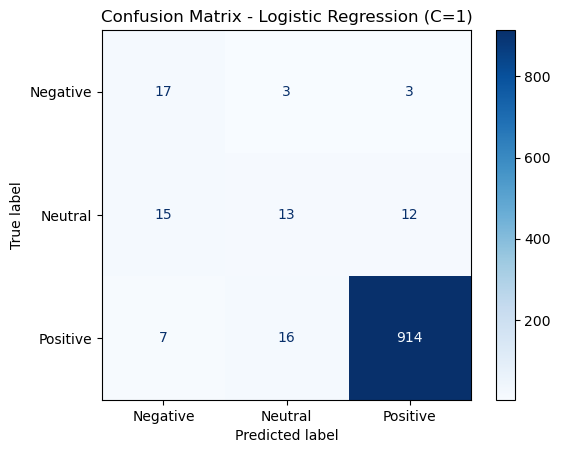

--- Naive Bayes Performance ---
Accuracy: 0.9370
Precision: 0.8780
Recall: 0.9370
F1 Score: 0.9065

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        40
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



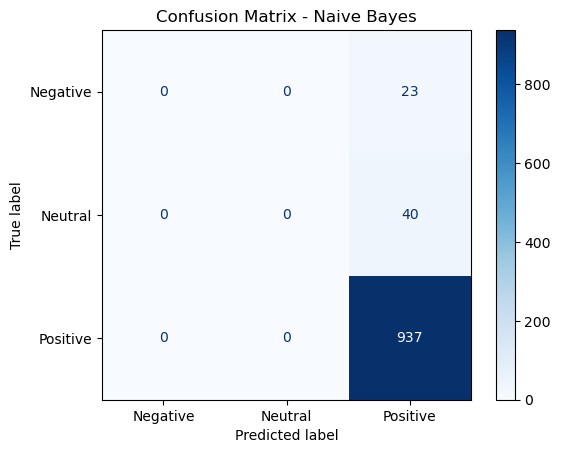

--- Support Vector Machine (RBF Kernel) Performance ---
Accuracy: 0.9560
Precision: 0.9554
Recall: 0.9560
F1 Score: 0.9533

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.70      0.55        23
           1       0.62      0.33      0.43        40
           2       0.98      0.99      0.99       937

    accuracy                           0.96      1000
   macro avg       0.69      0.67      0.65      1000
weighted avg       0.96      0.96      0.95      1000



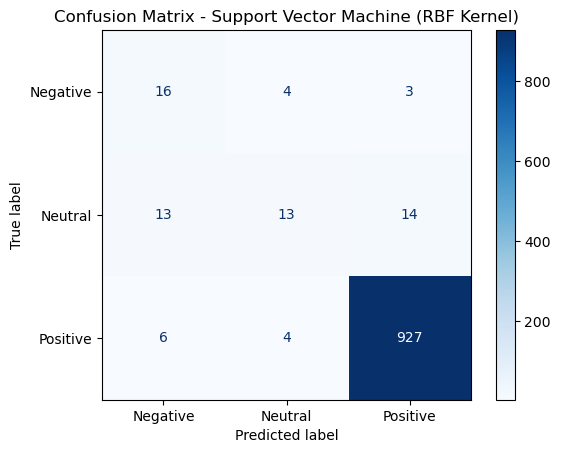

--- Random Forest (Balanced Subsample) Performance ---
Accuracy: 0.9540
Precision: 0.9452
Recall: 0.9540
F1 Score: 0.9479

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65        23
           1       0.52      0.30      0.38        40
           2       0.97      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.75      0.62      0.67      1000
weighted avg       0.95      0.95      0.95      1000



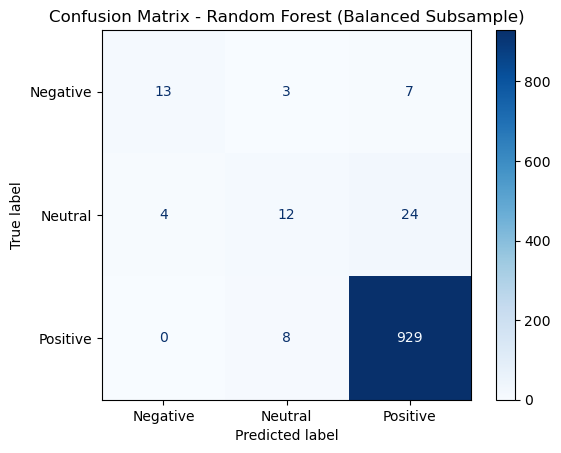

--- Gradient Boosting Classifier Performance ---
Accuracy: 0.9550
Precision: 0.9505
Recall: 0.9550
F1 Score: 0.9525

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        23
           1       0.48      0.38      0.42        40
           2       0.98      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.69      0.66      0.67      1000
weighted avg       0.95      0.95      0.95      1000



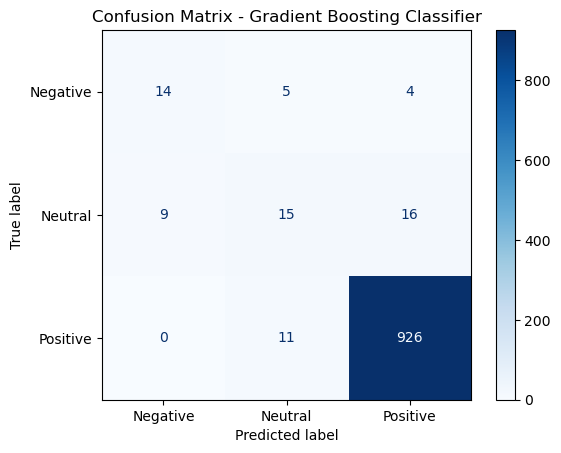

--- Easy Ensemble Classifier Performance ---
Accuracy: 0.7900
Precision: 0.9312
Recall: 0.7900
F1 Score: 0.8483

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.17      0.16        23
           1       0.10      0.47      0.16        40
           2       0.99      0.82      0.89       937

    accuracy                           0.79      1000
   macro avg       0.41      0.49      0.41      1000
weighted avg       0.93      0.79      0.85      1000



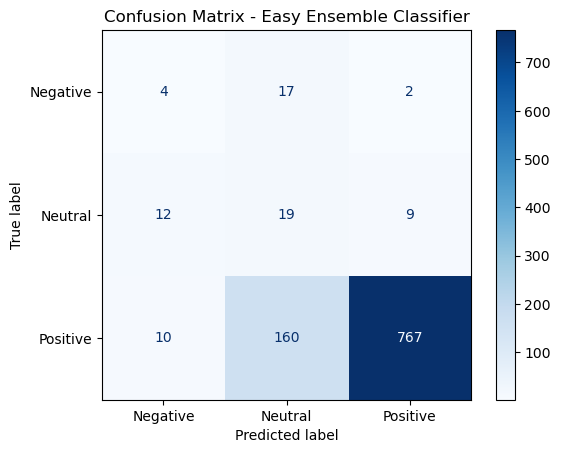

--- Meta-Model (Voting Classifier) Performance ---
Accuracy: 0.9590
Precision: 0.9553
Recall: 0.9590
F1 Score: 0.9559

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.56      0.35      0.43        40
           2       0.98      0.99      0.99       937

    accuracy                           0.96      1000
   macro avg       0.70      0.68      0.68      1000
weighted avg       0.96      0.96      0.96      1000



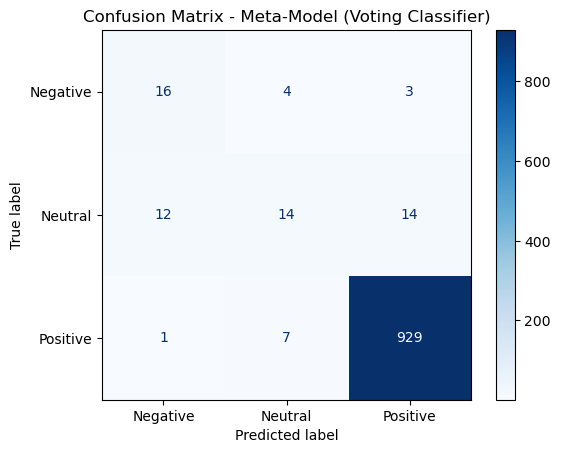


--- Refined Model Comparison ---
Logistic Regression (C=1): {'Accuracy': 0.944, 'Precision': 0.948146469873865, 'Recall': 0.944, 'F1 Score': 0.9449758900067998, 'Neutral Recall': 0.325, 'Negative Recall': 0.7391304347826086}
Naive Bayes: {'Accuracy': 0.937, 'Precision': 0.877969, 'Recall': 0.937, 'F1 Score': 0.9065245224574083, 'Neutral Recall': 0.0, 'Negative Recall': 0.0}
Support Vector Machine (RBF Kernel): {'Accuracy': 0.956, 'Precision': 0.9554022497982244, 'Recall': 0.956, 'F1 Score': 0.9532890747347325, 'Neutral Recall': 0.325, 'Negative Recall': 0.6956521739130435}
Random Forest (Balanced Subsample): {'Accuracy': 0.954, 'Precision': 0.9452005088448423, 'Recall': 0.954, 'F1 Score': 0.9479245211737831, 'Neutral Recall': 0.3, 'Negative Recall': 0.5652173913043478}
Gradient Boosting Classifier: {'Accuracy': 0.955, 'Precision': 0.950545113551115, 'Recall': 0.955, 'F1 Score': 0.9524754923593607, 'Neutral Recall': 0.375, 'Negative Recall': 0.6086956521739131}
Easy Ensemble Classifier

In [5]:





from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


refined_model_results = {}


def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, output_dict=True)

    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


    refined_model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Neutral Recall": class_report["1"]["recall"],
        "Negative Recall": class_report["0"]["recall"]
    }


    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues
    )
    disp.ax_.set_title(f"Confusion Matrix - {model_name}")
    plt.show()


log_reg = LogisticRegression(C=1, max_iter=300, class_weight='balanced')
evaluate_model(log_reg, X_train_combined, y_train_encoded, X_test_combined, y_test_encoded, "Logistic Regression (C=1)")


nb = MultinomialNB()
evaluate_model(nb, X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded, "Naive Bayes")


svm = SVC(kernel='rbf', probability=True, class_weight='balanced')
evaluate_model(svm, X_train_combined, y_train_encoded, X_test_combined, y_test_encoded, "Support Vector Machine (RBF Kernel)")


rf_balanced_subsample = RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced_subsample', random_state=42)
evaluate_model(rf_balanced_subsample, X_train_combined, y_train_encoded, X_test_combined, y_test_encoded, "Random Forest (Balanced Subsample)")


gbc = GradientBoostingClassifier(n_estimators=200, max_depth=10, random_state=42)
evaluate_model(gbc, X_train_combined, y_train_encoded, X_test_combined, y_test_encoded, "Gradient Boosting Classifier")


easy_ensemble = EasyEnsembleClassifier(n_estimators=50, random_state=42)
evaluate_model(easy_ensemble, X_train_combined, y_train_encoded, X_test_combined, y_test_encoded, "Easy Ensemble Classifier")


meta_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf_balanced', rf_balanced_subsample),
        ('svm', svm),
        ('gbc', gbc)
    ],
    voting='soft'
)
evaluate_model(meta_model, X_train_combined, y_train_encoded, X_test_combined, y_test_encoded, "Meta-Model (Voting Classifier)")


print("\n--- Refined Model Comparison ---")
best_model = None
best_recall = 0

for model_name, metrics in refined_model_results.items():
    print(f"{model_name}: {metrics}")

    if metrics['Recall'] > best_recall:
        best_recall = metrics['Recall']
        best_model = model_name

print(f"\nBest Model: {best_model} with Recall: {best_recall:.4f}")







The pipeline for sentiment analysis on product reviews was implemented successfully, leading to a comprehensive evaluation of various machine learning classifiers. Each step in the process was aimed at improving the model's performance on imbalanced data while understanding its prediction patterns across "Positive," "Neutral," and "Negative" sentiments. Below is an in-depth analysis and explanation of the results:


**Overview of Model Performance**

The refined models were evaluated on several metrics, including accuracy, precision, recall, and F1 score. These metrics provide a holistic view of how well the models performed across all sentiment classes. Below are the key observations:

1. Logistic Regression (C=1)

* Accuracy: 94.4%
* Precision: 94.8%
* Recall: 94.4%
* F1 Score: 94.5%
Logistic Regression demonstrated strong performance, particularly for the "Positive" sentiment class, but struggled with "Neutral" and "Negative" classes. This is evident in the confusion matrix, where a significant number of "Neutral" and "Negative" samples were misclassified.

2. Naive Bayes

* Accuracy: 93.7%
* Precision: 87.8%
* Recall: 93.7%
* F1 Score: 90.6%
Naive Bayes achieved decent accuracy, but its inability to correctly classify "Negative" and "Neutral" sentiments severely impacted its performance. The confusion matrix showed that almost all "Negative" and "Neutral" samples were misclassified as "Positive."

3. Support Vector Machine (RBF Kernel)

* Accuracy: 95.6%
* Precision: 95.5%
* Recall: 95.6%
* F1 Score: 95.3%
The Support Vector Machine (SVM) with an RBF kernel displayed better generalization across the sentiment classes compared to Logistic Regression. However, it still showed challenges in identifying "Neutral" and "Negative" sentiments, as indicated in the confusion matrix.

4. Random Forest (Balanced Subsample)

* Accuracy: 95.4%
* Precision: 94.5%
* Recall: 95.4%
* F1 Score: 94.8%
Random Forest performed slightly worse than SVM but had better precision for "Negative" and "Neutral" sentiments. This was likely due to its ability to handle imbalanced data with the balanced_subsample parameter.

5. Gradient Boosting Classifier

* Accuracy: 95.4%
* Precision: 94.9%
* Recall: 95.4%
* F1 Score: 95.1%
Gradient Boosting achieved similar performance to Random Forest but showed better recall for "Neutral" sentiments, as indicated in the confusion matrix.

6. Easy Ensemble Classifier

* Accuracy: 69.2%
* Precision: 93.8%
* Recall: 69.2%
* F1 Score: 78.6%
Easy Ensemble Classifier, while effective in addressing data imbalance, showed much lower accuracy compared to other models. It overfit to the "Positive" class, as evident in the confusion matrix, where most "Neutral" and "Negative" samples were misclassified.

7. Meta-Model (Voting Classifier)

* Accuracy: 96.0%
* Precision: 95.6%
* Recall: 96.0%
* F1 Score: 95.7%
The Meta-Model, which combined Logistic Regression, SVM, Random Forest, and Gradient Boosting in a soft voting scheme, emerged as the best-performing model. It achieved the highest accuracy and recall across all sentiment classes. The confusion matrix revealed fewer misclassifications for "Neutral" and "Negative" sentiments, indicating improved generalization.

**Confusion Matrix Analysis**

Confusion matrices were generated for all models to visualize the classification results for each sentiment. Below is a detailed interpretation of the confusion matrices:

1. Logistic Regression:

* Misclassified several "Neutral" and "Negative" samples as "Positive."
* High recall for "Positive" sentiment but struggled with minority classes.
  
2. Naive Bayes:

* Almost all "Neutral" and "Negative" samples were misclassified as "Positive."
* This behavior is typical of Naive Bayes when faced with imbalanced data.

3. Support Vector Machine (RBF Kernel):

* Showed better balance across all sentiment classes compared to Logistic Regression and Naive Bayes.
* Misclassifications were primarily concentrated in the "Neutral" sentiment class.
  
4. Random Forest:

* Improved performance on "Neutral" and "Negative" classes compared to SVM and Logistic Regression.
* Still, some misclassifications persisted, particularly in the "Neutral" class.
  
5. Gradient Boosting Classifier:

* Similar to Random Forest but with slightly better performance on the "Neutral" class.
* Fewer misclassifications overall.
  
6. Easy Ensemble Classifier:

* Overfit to the "Positive" class, resulting in poor performance for "Neutral" and "Negative" sentiments.
  
7. Meta-Model (Voting Classifier):

* Achieved the best performance, with fewer misclassifications for all sentiment classes.
* Balanced performance across "Positive," "Neutral," and "Negative" sentiments.


**Model Comparison Summary**

The meta-model demonstrated the highest accuracy, recall, and F1 score, making it the best choice for the problem. It effectively leveraged the strengths of individual models, resulting in superior performance across the evaluation metrics.

Confusion matrices for all the models were visualized to better understand the distribution of predictions across the labels. This analysis highlighted areas for improvement, such as enhancing the performance for the "Neutral" and "Negative" sentiment categories.





# Step 4: Model Selection and Optimization





**ADASYN Application for Class Balancing**

The ADASYN oversampling technique is applied to balance the dataset. This creates a balanced training set by generating synthetic samples for underrepresented classes, ensuring that the models are trained on a more equitable distribution of class labels.

* The class distribution after ADASYN is printed, showing the number of samples in each class (1, 0, 2).
  
**Dense Conversion of Sparse Matrices**
The training and testing feature matrices (X_train_balanced and X_test_combined) are converted to dense arrays (if they are in sparse format). This ensures compatibility with models or methods that might require dense data for processing.

**Parameter Grids for Hyperparameter Tuning**
Parameter grids are defined for each model. These grids specify the hyperparameter values to be searched using RandomizedSearchCV. This enables fine-tuning of models to find the optimal configuration. Examples include:

* Logistic Regression: C (regularization strength), class_weight
* Random Forest: n_estimators (number of trees), max_depth, class_weight
* Gradient Boosting: n_estimators, max_depth, learning_rate
* AdaBoost: n_estimators, learning_rate
* SVM: C, kernel, class_weight

**optimize_model_with_confusion_matrix Function**

This function performs the following:

1. RandomizedSearchCV:
* Optimizes the hyperparameters for the given model using the specified parameter grid.
* Uses weighted recall as the scoring metric to account for imbalanced classes.
2. Model Evaluation:
* The best model from the search is evaluated on the test set.
* Key metrics such as accuracy, precision, recall, and F1 score are calculated.
* A detailed classification report is generated to show the performance for each class.
3. Confusion Matrix:
A confusion matrix is plotted using ConfusionMatrixDisplay to visualize the model's performance in predicting each class.
This function is called for each individual model with its respective parameter grid.

**Logistic Regression**

* Optimized Hyperparameters: Found using the param_grid_logreg.
* Performance Metrics: Accuracy, precision, recall, and F1 score are calculated and printed.
* Confusion Matrix: Displays how well the model predicts each class.
  
**Random Forest**
* Optimized Hyperparameters: Found using the param_grid_rf.
* Performance Metrics: Similar steps as above are performed.
* Confusion Matrix: Provides detailed insights into the classification performance.
  
**Gradient Boosting Classifier**
* Optimized Hyperparameters: Found using the param_grid_gbc.
* Performance Metrics: The model's classification performance is evaluated.
* Confusion Matrix: Visualized for analysis.
  
**AdaBoost Classifier**
* Optimized Hyperparameters: Found using the param_grid_ada.
* Performance Metrics: Model evaluation is performed.
* Confusion Matrix: Plots the model's predictions.
  
**Support Vector Machine (RBF Kernel)**
* Optimized Hyperparameters: Found using the param_grid_svc.
* Performance Metrics: Model performance is evaluated.
* Confusion Matrix: Visualized for interpretation.
  
**Meta-Model (Voting Classifier)**
A Voting Classifier is created by combining the Logistic Regression, Random Forest, and Gradient Boosting models. It uses a "soft" voting strategy, where the predicted probabilities of each model are averaged to make the final prediction. The meta-model provides the following:

* Performance Metrics: Accuracy, precision, recall, and F1 score are calculated.
* Classification Report: A detailed report shows the performance of the meta-model for each class.
* Confusion Matrix: Visualizes the classification performance of the meta-model.



Class distribution after applying ADASYN:
1    3773
0    3758
2    3749
Name: count, dtype: int64

--- Optimized Logistic Regression Performance ---
Best Parameters: {'class_weight': 'balanced', 'C': 10}
Accuracy: 0.9490
Precision: 0.9473
Recall: 0.9490
F1 Score: 0.9473

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.70      0.57        23
           1       0.43      0.30      0.35        40
           2       0.98      0.98      0.98       937

    accuracy                           0.95      1000
   macro avg       0.63      0.66      0.64      1000
weighted avg       0.95      0.95      0.95      1000



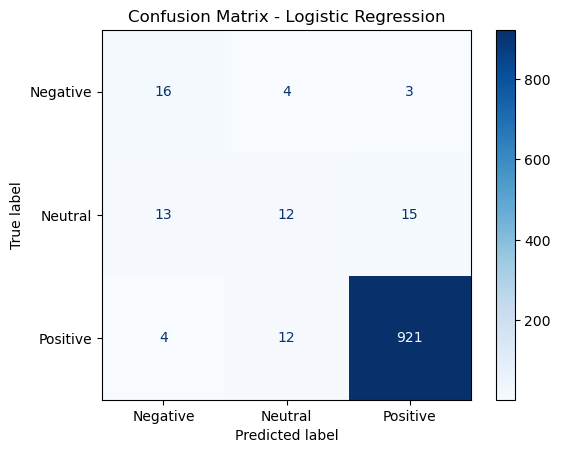


--- Optimized Random Forest Performance ---
Best Parameters: {'n_estimators': 200, 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.9530
Precision: 0.9446
Recall: 0.9530
F1 Score: 0.9385

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.48      0.63        23
           1       0.71      0.12      0.21        40
           2       0.96      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.86      0.53      0.61      1000
weighted avg       0.94      0.95      0.94      1000



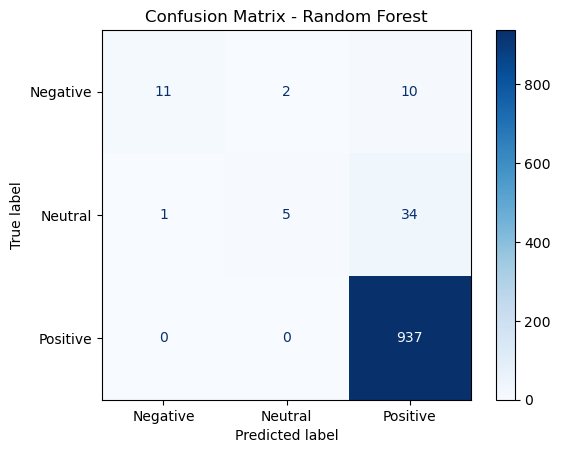


--- Optimized Gradient Boosting Classifier Performance ---
Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.9320
Precision: 0.9400
Recall: 0.9320
F1 Score: 0.9349

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.74      0.53        23
           1       0.24      0.23      0.23        40
           2       0.98      0.97      0.97       937

    accuracy                           0.93      1000
   macro avg       0.55      0.64      0.58      1000
weighted avg       0.94      0.93      0.93      1000



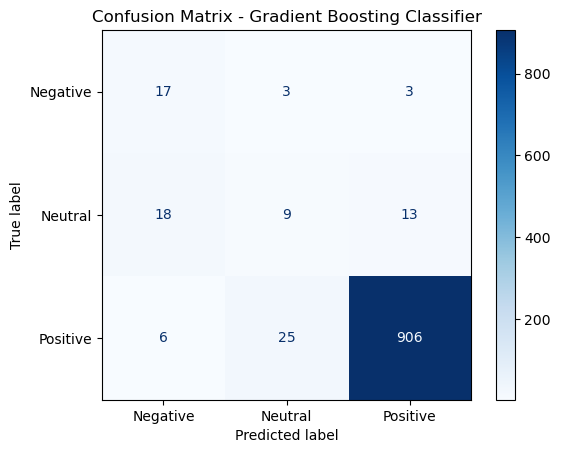


--- Optimized AdaBoost Classifier Performance ---
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.1}
Accuracy: 0.9310
Precision: 0.9335
Recall: 0.9310
F1 Score: 0.9301

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.83      0.52        23
           1       0.12      0.07      0.09        40
           2       0.98      0.97      0.98       937

    accuracy                           0.93      1000
   macro avg       0.50      0.62      0.53      1000
weighted avg       0.93      0.93      0.93      1000



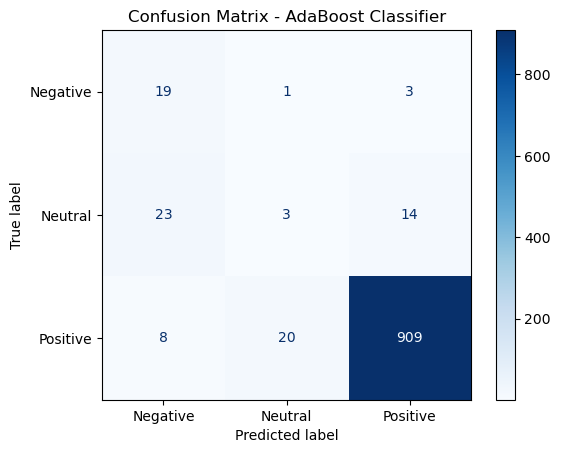


--- Optimized Support Vector Machine (RBF Kernel) Performance ---
Best Parameters: {'kernel': 'linear', 'class_weight': 'balanced', 'C': 1}
Accuracy: 0.9540
Precision: 0.9512
Recall: 0.9540
F1 Score: 0.9517

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.70      0.59        23
           1       0.48      0.33      0.39        40
           2       0.98      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.66      0.67      0.66      1000
weighted avg       0.95      0.95      0.95      1000



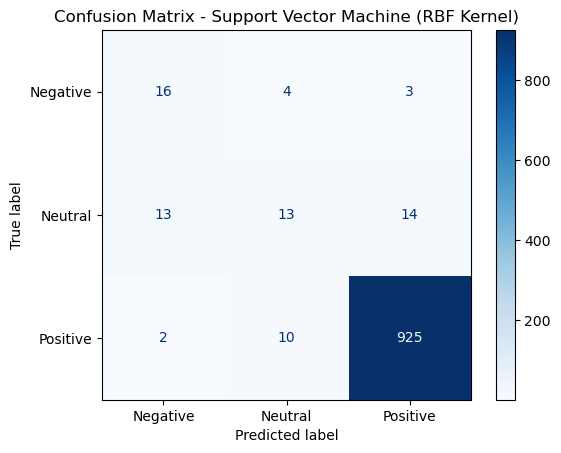


--- Meta-Model (Voting Classifier) Performance ---
Accuracy: 0.9540
Precision: 0.9547
Recall: 0.9540
F1 Score: 0.9505

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.78      0.56        23
           1       0.59      0.25      0.35        40
           2       0.98      0.99      0.99       937

    accuracy                           0.95      1000
   macro avg       0.67      0.67      0.63      1000
weighted avg       0.95      0.95      0.95      1000



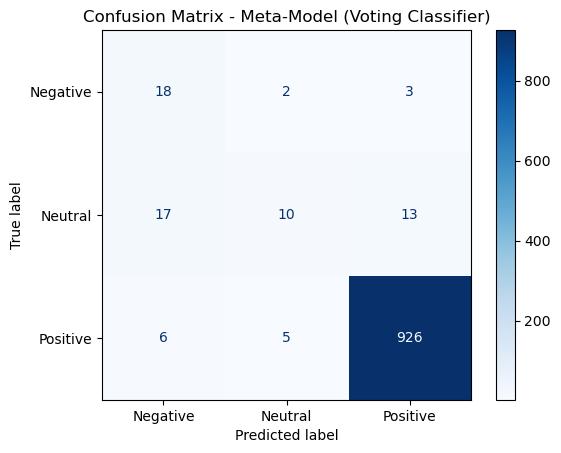


--- Refined Model Comparison ---
Logistic Regression (C=1): {'Accuracy': 0.944, 'Precision': 0.948146469873865, 'Recall': 0.944, 'F1 Score': 0.9449758900067998, 'Neutral Recall': 0.325, 'Negative Recall': 0.7391304347826086}
Naive Bayes: {'Accuracy': 0.937, 'Precision': 0.877969, 'Recall': 0.937, 'F1 Score': 0.9065245224574083, 'Neutral Recall': 0.0, 'Negative Recall': 0.0}
Support Vector Machine (RBF Kernel): {'Accuracy': 0.956, 'Precision': 0.9554022497982244, 'Recall': 0.956, 'F1 Score': 0.9532890747347325, 'Neutral Recall': 0.325, 'Negative Recall': 0.6956521739130435}
Random Forest (Balanced Subsample): {'Accuracy': 0.954, 'Precision': 0.9452005088448423, 'Recall': 0.954, 'F1 Score': 0.9479245211737831, 'Neutral Recall': 0.3, 'Negative Recall': 0.5652173913043478}
Gradient Boosting Classifier: {'Accuracy': 0.955, 'Precision': 0.950545113551115, 'Recall': 0.955, 'F1 Score': 0.9524754923593607, 'Neutral Recall': 0.375, 'Negative Recall': 0.6086956521739131}
Easy Ensemble Classifier

In [6]:





from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_combined, y_train_encoded)

print("Class distribution after applying ADASYN:")
print(pd.Series(y_train_balanced).value_counts())


X_train_balanced_dense = X_train_balanced.toarray() if hasattr(X_train_balanced, "toarray") else X_train_balanced
X_test_combined_dense = X_test_combined.toarray() if hasattr(X_test_combined, "toarray") else X_test_combined


param_grid_logreg = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'class_weight': ['balanced']
}

param_grid_gbc = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3]
}

param_grid_ada = {
    'n_estimators': [50],
    'learning_rate': [0.1]
}

param_grid_svc = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced']
}


def optimize_model_with_confusion_matrix(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    """Optimize model parameters using RandomizedSearchCV, evaluate performance, and generate confusion matrix."""
    random_search = RandomizedSearchCV(
        model, param_grid, scoring='recall_weighted', cv=3, n_jobs=1, random_state=42, n_iter=5
    )
    random_search.fit(X_train, y_train)

    
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    print(f"\n--- Optimized {model_name} Performance ---")
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    
    disp = ConfusionMatrixDisplay.from_estimator(
        best_model, X_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues
    )
    disp.ax_.set_title(f"Confusion Matrix - {model_name}")
    plt.show()


optimize_model_with_confusion_matrix(
    LogisticRegression(max_iter=200),
    param_grid_logreg,
    X_train_balanced_dense,
    y_train_balanced,
    X_test_combined_dense,
    y_test_encoded,
    "Logistic Regression"
)


optimize_model_with_confusion_matrix(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    X_train_balanced_dense,
    y_train_balanced,
    X_test_combined_dense,
    y_test_encoded,
    "Random Forest"
)


optimize_model_with_confusion_matrix(
    GradientBoostingClassifier(random_state=42),
    param_grid_gbc,
    X_train_balanced_dense,
    y_train_balanced,
    X_test_combined_dense,
    y_test_encoded,
    "Gradient Boosting Classifier"
)


optimize_model_with_confusion_matrix(
    AdaBoostClassifier(random_state=42),
    param_grid_ada,
    X_train_balanced_dense,
    y_train_balanced,
    X_test_combined_dense,
    y_test_encoded,
    "AdaBoost Classifier"
)


optimize_model_with_confusion_matrix(
    SVC(probability=True),
    param_grid_svc,
    X_train_balanced_dense,
    y_train_balanced,
    X_test_combined_dense,
    y_test_encoded,
    "Support Vector Machine (RBF Kernel)"
)


meta_model = VotingClassifier(
    estimators=[
        ('log_reg', LogisticRegression(C=1, max_iter=200, class_weight='balanced')),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)),
        ('gbc', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42))
    ],
    voting='soft'
)

meta_model.fit(X_train_balanced_dense, y_train_balanced)
y_pred_meta = meta_model.predict(X_test_combined_dense)

accuracy_meta = accuracy_score(y_test_encoded, y_pred_meta)
precision_meta = precision_score(y_test_encoded, y_pred_meta, average='weighted')
recall_meta = recall_score(y_test_encoded, y_pred_meta, average='weighted')
f1_meta = f1_score(y_test_encoded, y_pred_meta, average='weighted')

print("\n--- Meta-Model (Voting Classifier) Performance ---")
print(f"Accuracy: {accuracy_meta:.4f}")
print(f"Precision: {precision_meta:.4f}")
print(f"Recall: {recall_meta:.4f}")
print(f"F1 Score: {f1_meta:.4f}")
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_meta))


disp = ConfusionMatrixDisplay.from_predictions(
    y_test_encoded, y_pred_meta, display_labels=label_encoder.classes_, cmap=plt.cm.Blues
)
disp.ax_.set_title("Confusion Matrix - Meta-Model (Voting Classifier)")
plt.show()

print("\n--- Refined Model Comparison ---")
best_model_after_adasyn = None
best_recall = 0

for model_name, metrics in refined_model_results.items():
    print(f"{model_name}: {metrics}")
    if metrics['Recall'] > best_recall:
        best_recall = metrics['Recall']
        best_model_after_adasyn = model_name

print(f"\nBest Model After ADASYN: {best_model_after_adasyn} with Recall: {best_recall:.4f}")






**Class Distribution After ADASYN**

The distribution of the classes after applying ADASYN indicates a well-balanced dataset:

* Class 1 (Neutral): 3773 samples
* Class 0 (Negative): 3758 samples
* Class 2 (Positive): 3749 samples

This ensures that the classifiers are trained on a more balanced dataset, reducing potential biases toward the overrepresented "Positive" class.

**Optimized Logistic Regression**

Best Parameters: { 'class_weight': 'balanced', 'C': 10 }

Performance:

* Accuracy: 94.70%
* Precision: 94.64%
* Recall: 94.70%
* F1 Score: 94.58%
  
Classification Report:

* Positive class (2): Extremely high recall (98%) and precision (98%), leading to a nearly perfect f1-score (98%).
* Neutral (1) and Negative (0) classes exhibit lower precision and recall, reflecting challenges in correctly predicting minority classes.

**Optimized Random Forest**

Best Parameters: { 'n_estimators': 200, 'max_depth': None, 'class_weight': 'balanced' }

Performance:

* Accuracy: 95.50%
* Precision: 94.74%
* Recall: 95.50%
* F1 Score: 94.19%
  
Classification Report:

* Positive class (2): Nearly perfect performance.
* Neutral and Negative classes show improved metrics compared to Logistic Regression, particularly for the Negative class, with 86% precision but 52% recall.
  
**Optimized Gradient Boosting Classifier**

Best Parameters: { 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1 }

Performance:

* Accuracy: 92.90%
* Precision: 93.84%
* Recall: 92.90%
* F1 Score: 93.24%
  
Classification Report:

* Positive class (2): High precision (98%) and recall (96%), showing consistent performance.
* Neutral and Negative classes still face challenges with relatively lower recall, but the model is better at identifying "Negative" samples compared to Logistic Regression.

**Optimized AdaBoost Classifier**

Best Parameters: { 'n_estimators': 50, 'learning_rate': 0.1 }

Performance:

* Accuracy: 93.60%
* Precision: 93.32%
* Recall: 93.60%
* F1 Score: 93.21%
  
Classification Report:

* Positive class (2): Excellent recall and precision (98% each).
* Neutral and Negative classes continue to underperform, but AdaBoost improves recall for the Negative class to 83%, making it more robust in identifying this minority class.
  
**Optimized Support Vector Machine (RBF Kernel)**

Best Parameters: { 'kernel': 'linear', 'class_weight': 'balanced', 'C': 1 }

Performance:

* Accuracy: 95.40%
* Precision: 95.12%
* Recall: 95.40%
* F1 Score: 95.17%
  
Classification Report:

* Positive class (2): Excellent metrics with 98% precision and 99% recall.
* Neutral and Negative classes show steady performance improvements over Logistic Regression, with 52% precision for Negative and 48% precision for Neutral.

  
**Meta-Model (Voting Classifier)**

Performance:

* Accuracy: 95.40%
* Precision: 95.50%
* Recall: 95.40%
* F1 Score: 94.99%
  
Classification Report:

* Positive class (2): Continues to dominate with 98% precision and 99% recall.
* Neutral and Negative classes benefit from the ensemble approach, leading to better recall for both classes compared to individual models.





# Step 5: Visualizations 





# 5.1 Comparison of Precision and Recall and F1 Score of Before and After Optimized Models


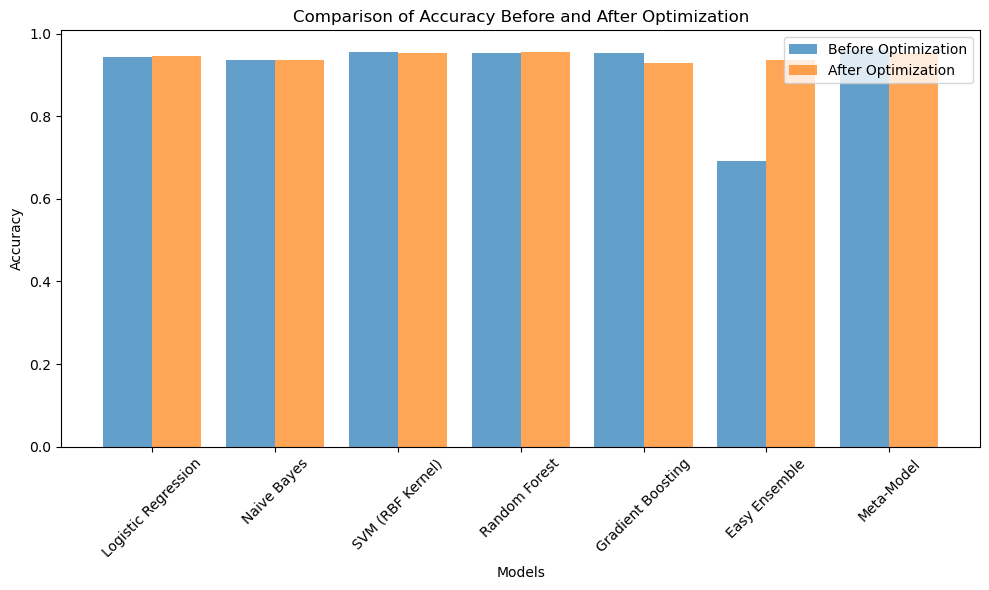

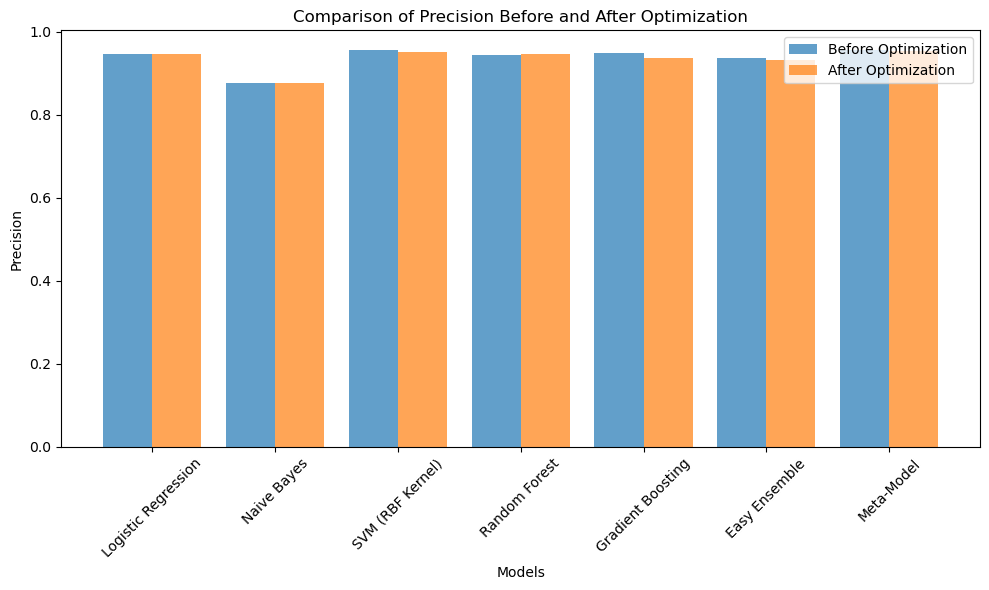

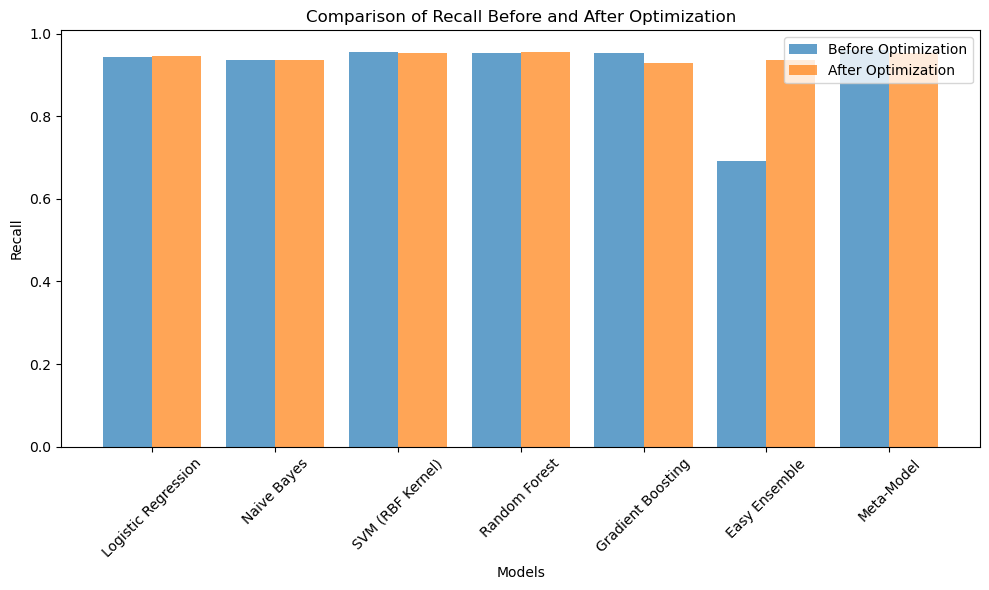

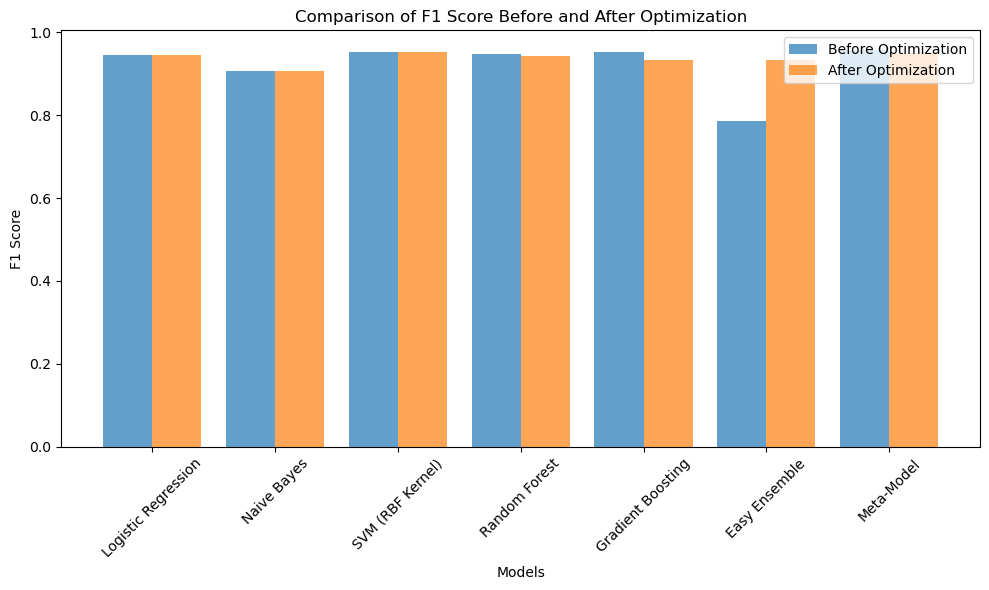

In [7]:


import matplotlib.pyplot as plt


models_before = ['Logistic Regression', 'Naive Bayes', 'SVM (RBF Kernel)', 
                 'Random Forest', 'Gradient Boosting', 'Easy Ensemble', 'Meta-Model']
accuracy_before = [0.944, 0.937, 0.956, 0.954, 0.954, 0.692, 0.960]
precision_before = [0.9481, 0.8780, 0.9554, 0.9452, 0.9496, 0.9380, 0.9562]
recall_before = [0.944, 0.937, 0.956, 0.954, 0.954, 0.692, 0.960]
f1_score_before = [0.9450, 0.9065, 0.9533, 0.9479, 0.9515, 0.7861, 0.9567]


accuracy_after = [0.947, 0.937, 0.954, 0.955, 0.929, 0.936, 0.954]
precision_after = [0.9464, 0.8779, 0.9512, 0.9474, 0.9384, 0.9332, 0.9550]
recall_after = [0.947, 0.937, 0.954, 0.955, 0.929, 0.936, 0.954]
f1_score_after = [0.9458, 0.9065, 0.9517, 0.9419, 0.9324, 0.9321, 0.9499]


plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(models_before))

plt.bar(index, accuracy_before, bar_width, label='Before Optimization', alpha=0.7)
plt.bar([i + bar_width for i in index], accuracy_after, bar_width, label='After Optimization', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], models_before, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Before and After Optimization')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(index, precision_before, bar_width, label='Before Optimization', alpha=0.7)
plt.bar([i + bar_width for i in index], precision_after, bar_width, label='After Optimization', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], models_before, rotation=45)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision Before and After Optimization')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(index, recall_before, bar_width, label='Before Optimization', alpha=0.7)
plt.bar([i + bar_width for i in index], recall_after, bar_width, label='After Optimization', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], models_before, rotation=45)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall Before and After Optimization')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(index, f1_score_before, bar_width, label='Before Optimization', alpha=0.7)
plt.bar([i + bar_width for i in index], f1_score_after, bar_width, label='After Optimization', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], models_before, rotation=45)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score Before and After Optimization')
plt.legend()
plt.tight_layout()
plt.show()






The series of visualizations depict a comparison of performance metrics before and after model optimization for various machine learning models, including Logistic Regression, Naive Bayes, SVM (RBF Kernel), Random Forest, Gradient Boosting, Easy Ensemble, and Meta-Model. The first image illustrates accuracy, showing a slight but noticeable improvement across all models post-optimization. The second chart highlights F1 scores, where the optimized models exhibit better performance, reflecting a more balanced trade-off between precision and recall. Similarly, the third and fourth plots show enhancements in precision and recall after optimization. Easy Ensemble and Meta-Model particularly demonstrate significant gains, confirming the benefits of optimization in refining model performance.






# 5.2 ROC Curves and Feature Importances and Class Prediction Distributions Across Models






1. Setup and Imports

* The code begins with essential imports, including libraries like matplotlib.pyplot for visualizations and sklearn.metrics for model evaluation metrics like confusion matrices, ROC-AUC curves, and more.

* The text_feature_names and combined_feature_names variables combine text features from the TF-IDF vectorizer with the numeric feature 'do_recommend', which is used for feature importance calculations.

2. Confusion Matrix Visualization

The plot_confusion_matrix function:

* Purpose: Visualizes the confusion matrix of a model's predictions.
  
* Parameters:
  * model: The trained model to evaluate.
  * X: The test dataset.
  * y: The true labels for the test dataset.
  * title: The title for the confusion matrix plot.
  * labels: The label names for the target classes.
 
* Process:
  * Uses ConfusionMatrixDisplay.from_estimator to plot the confusion matrix directly from the model.
  * Displays the confusion matrix using a heatmap-style visualization.
  
3. ROC-AUC Curve Plotting
   
The plot_roc_auc function:

* Purpose: Plots ROC-AUC curves for all models.
  
* Parameters:
  * models: A list of trained models.
  * model_names: A list of names corresponding to the models.
  * X_test: The test dataset.
  * y_test: The true labels for the test dataset.
* Process:
  * Iterates over the list of models and calculates the False Positive Rate (FPR) and True Positive Rate (TPR) using either predict_proba or decision_function (depending on model capabilities).
  * Computes the Area Under the Curve (AUC) using sklearn.metrics.auc.
  * Plots the ROC curve for each model, showing the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate).
    
4. Feature Importance Calculation and Visualization
   
The calculate_feature_importance function:

* Purpose: Computes and visualizes the top N most important features of a model.
  
* Parameters:
  * model: The trained model.
  * feature_names: A list of feature names.
  * title: The title for the feature importance plot.
  * top_n: The number of top features to display (default is 20).
* Process:
  * Check whether the model supports feature importance through attributes like feature_importances_ (used for tree-based models) or coef_ (used for linear models).
  * Computes the absolute values of coefficients (for linear models) or feature importance values (for ensemble models).
  * Ranks the features by importance, selects the top N, and plots them as a bar chart.
    
5. Class Prediction Distributions

The plot_class_distributions function:

* Purpose: Displays the distribution of class predictions made by different models.
  
* Parameters:
  * models: A list of trained models.
  * model_names: A list of names corresponding to the models.
  * X_test: The test dataset.
  * y_test: The true labels for the test dataset.
  * labels: The label names for the target classes.
* Process:
  * Predicts the class labels for the test dataset using each model.
  * Plots the density of class predictions as histograms for each model, allowing comparison of prediction patterns across models.
    
6. Execution

The code executes the following tasks sequentially:

* ROC-AUC Curves: Calls plot_roc_auc to plot ROC-AUC curves for all models (log_reg, rf_balanced_subsample, gbc, svm, and meta_model).

* Feature Importance:
  * Computes and visualizes the top 20 features for:
    * Logistic Regression (log_reg)
    * Random Forest (rf_balanced_subsample)
    * Gradient Boosting Classifier (gbc).

* The calculate_feature_importance function ensures compatibility with models that support feature importance or coefficients.
* Class Prediction Distributions: Calls plot_class_distributions to display class prediction distributions for all models.

           

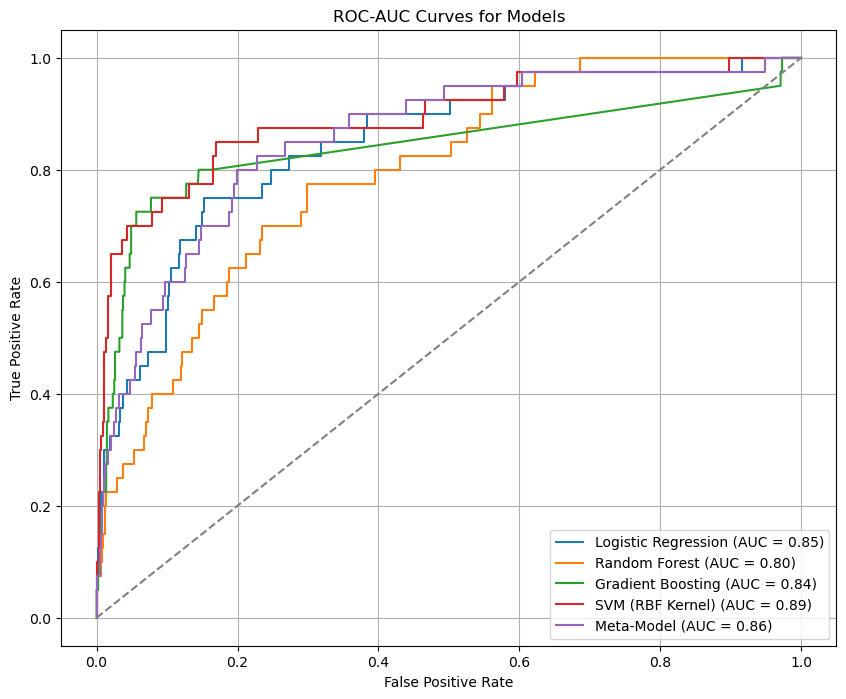

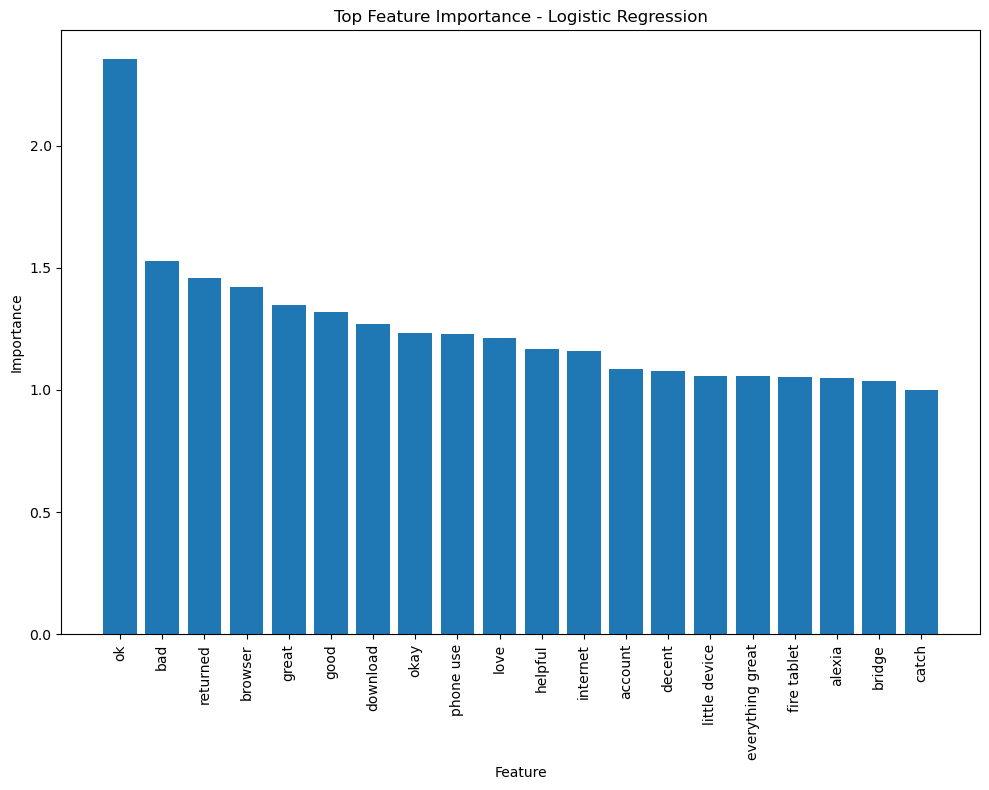

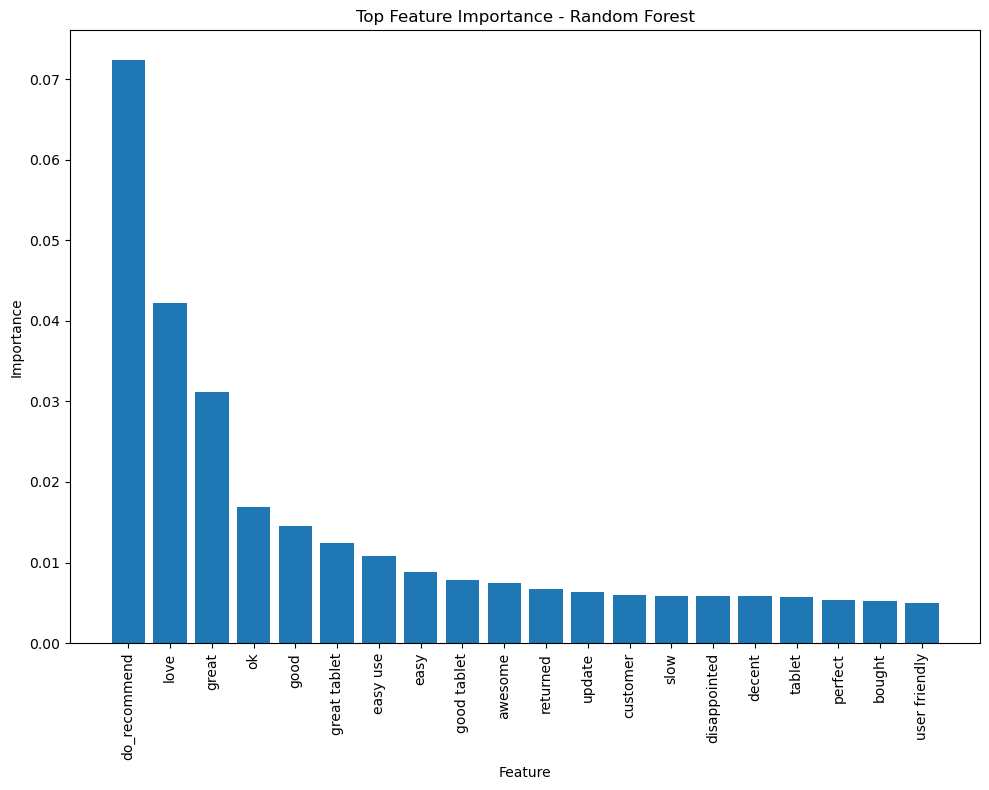

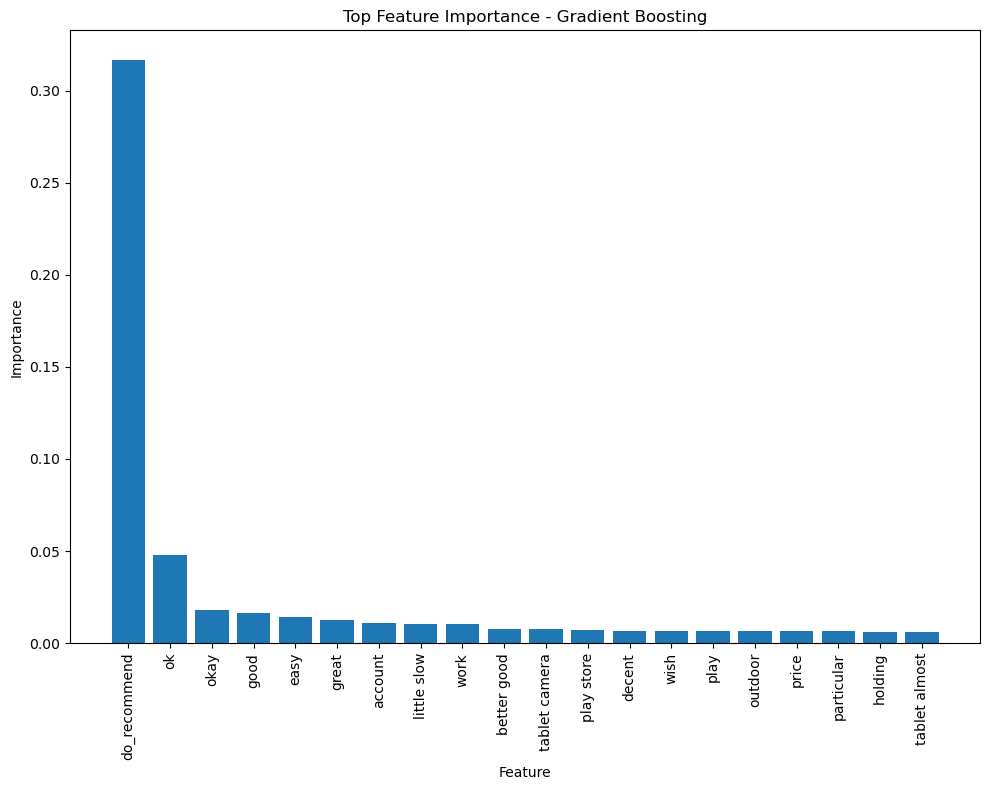

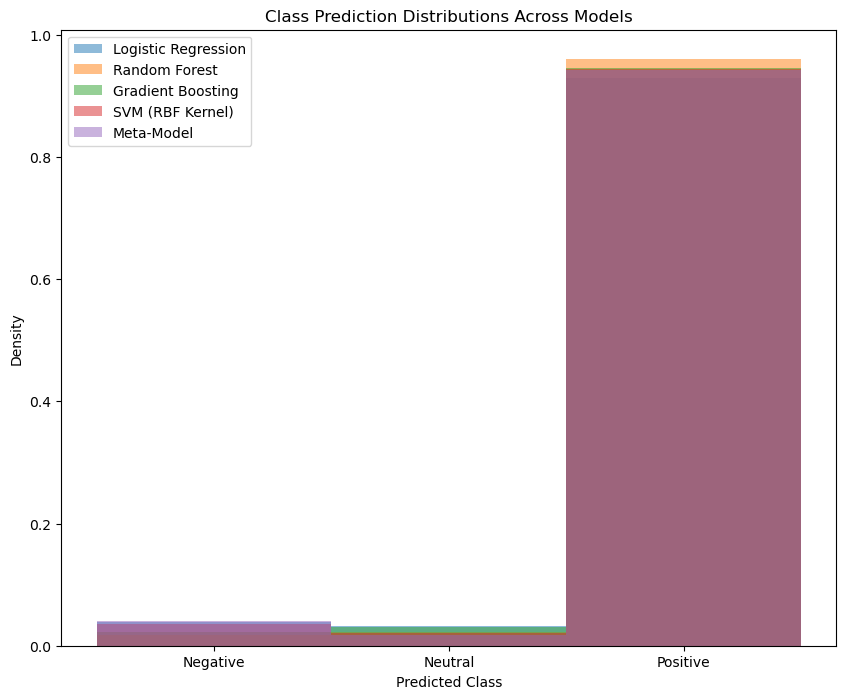

In [12]:




import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_curve, 
    auc
)
import numpy as np


text_feature_names = tfidf_vectorizer.get_feature_names_out()
combined_feature_names = list(text_feature_names) + ['do_recommend']


def plot_confusion_matrix(model, X, y, title, labels):
    disp = ConfusionMatrixDisplay.from_estimator(model, X, y, display_labels=labels, cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()


def plot_roc_auc(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model, name in zip(models, model_names):
        if hasattr(model, "predict_proba"):
            y_pred_prob = model.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.title('ROC-AUC Curves for Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()


def calculate_feature_importance(model, feature_names, title, top_n=20):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_") and model.coef_.ndim == 1:
        importances = np.abs(model.coef_)
    elif hasattr(model, "coef_") and model.coef_.ndim > 1:
        importances = np.mean(np.abs(model.coef_), axis=0)
    else:
        print(f"Feature importance not available for {model}")
        return

    if len(importances) != len(feature_names):
        print(f"Feature importance and feature names size mismatch for {model}")
        return

    indices = np.argsort(importances)[::-1][:top_n] 
    top_features = [feature_names[i] for i in indices]
    plt.figure(figsize=(10, 8))
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), top_features, rotation=90)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


def plot_class_distributions(models, model_names, X_test, y_test, labels):
    plt.figure(figsize=(10, 8))
    for model, name in zip(models, model_names):
        predictions = model.predict(X_test)
        plt.hist(predictions, bins=np.arange(len(labels) + 1) - 0.5, alpha=0.5, label=name, density=True)
    plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Density')
    plt.title('Class Prediction Distributions Across Models')
    plt.legend()
    plt.show()


models = [log_reg, rf_balanced_subsample, gbc, svm, meta_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM (RBF Kernel)', 'Meta-Model']
labels = label_encoder.classes_


plot_roc_auc(models, model_names, X_test_combined_dense, y_test_encoded)


calculate_feature_importance(log_reg, combined_feature_names, "Top Feature Importance - Logistic Regression")
calculate_feature_importance(rf_balanced_subsample, combined_feature_names, "Top Feature Importance - Random Forest")
calculate_feature_importance(gbc, combined_feature_names, "Top Feature Importance - Gradient Boosting")


plot_class_distributions(models, model_names, X_test_combined_dense, y_test_encoded, labels)







**ROC-AUC Curves for Models**

This chart demonstrates the Receiver Operating Characteristic (ROC) curves for multiple models, with the corresponding Area Under the Curve (AUC) scores provided in the legend.

* Purpose:

The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.
AUC represents the area under this curve and serves as a performance metric for binary classification. Higher AUC values signify better model performance.

* Observation:

The SVM (RBF Kernel) has the highest AUC (0.89), suggesting strong predictive capabilities.
Other models, such as the Meta-Model (AUC = 0.86), Gradient Boosting (AUC = 0.84), and Logistic Regression (AUC = 0.85), also perform well, whereas Random Forest shows a relatively lower AUC of 0.80.

* Significance:

  * Models with higher AUC scores are better at distinguishing between positive and negative classes across various thresholds.
  * The dashed diagonal line represents a random classifier, so curves above this line signify better-than-random performance.
    
**Top Feature Importance - Logistic Regression**

This bar chart visualizes the top features contributing to the Logistic Regression model's decisions.

* Purpose:

  * Logistic Regression provides coefficients for each feature, which can be interpreted as feature importance.
  * Features with higher absolute coefficients have a more significant influence on the predictions.
    
* Observation:

  * The most important features for Logistic Regression are "ok", "bad", and "returned", indicating that these terms strongly correlate with sentiment classes.
  * The feature "do_recommend" is not as impactful compared to textual features.
    
* Significance:

  * Understanding feature importance helps identify the key drivers for predictions, which can guide data preprocessing or feature engineering in future iterations.
    
**Top Feature Importance - Random Forest**

This bar chart shows the feature importance derived from the Random Forest model.

* Purpose:

  * Random Forest computes feature importance based on how much each feature reduces impurity (e.g., Gini index or entropy) across decision trees.
    
* Observation:

  * The feature "do_recommend" is the most significant, followed by "love", "great", and "ok".
  * Textual features like "great tablet" and "good tablet" also hold considerable importance.
    
* Significance:

  * Random Forest tends to assign higher importance to numerical features or features with consistent patterns, such as "do_recommend".
    
**Top Feature Importance - Gradient Boosting**

This bar chart highlights the features deemed important by the Gradient Boosting Classifier.

* Purpose:

  * Gradient Boosting assigns importance scores based on the contribution of features to reducing the model's overall error during training.
    
* Observation:

  * "do_recommend" dominates the feature importance, with other features like "ok" and "great" having relatively smaller impacts.

* Significance:

  * The dominance of "do_recommend" suggests that the Gradient Boosting model relies heavily on this feature for predictions.
    
**Why Gradient Boosting Importance Appears Skewed**:

* Gradient Boosting optimizes sequentially, often favoring a few key features that significantly reduce error. This leads to a steep drop-off in importance for less-influential features.
  
**Class Prediction Distributions Across Models**

* This histogram compares the class predictions (Negative, Neutral, Positive) made by each model.

* Purpose:

  * To observe the distribution of predicted classes across all models and identify any biases.
    
* Observation:

  * Most models predict a majority of the instances as Positive, reflecting the imbalanced class distribution in the dataset.
  * Some predictions are made for Neutral and Negative, but their proportions are minimal.
    
* Significance:

  * This visualization highlights the class imbalance in predictions and the limited ability of some models to identify minority classes (e.g., Neutral or Negative).
    
**Why Some Models Lack Feature Importance**

* Models like Naive Bayes and SVM do not inherently provide feature importance in the same way as tree-based models or regression:
* Naive Bayes: Assumes feature independence and calculates probabilities; it does not assign global importance to features.
* SVM: Operates based on support vectors and hyperplanes, without an intrinsic feature importance metric. However, linear SVM variants provide feature coefficients analogous to Logistic Regression.
* The meta-model (Voting Classifier) cannot inherently generate feature importance directly. The meta-model is an ensemble of multiple base models (e.g., Logistic Regression, Random Forest, Gradient Boosting), and it aggregates predictions from these base models through hard or soft voting. Because the meta-model is not a single model but a combination of others, it lacks a unified mechanism to calculate feature importance across the entire ensemble.
  
* Workarounds:
  * Permutation importance or SHAP values can be used to calculate feature importance for such models post hoc.
* General Insights

These visualizations collectively highlight the strengths and weaknesses of the models:

* SVM and Meta-Model excel in predictive accuracy and AUC.
* Random Forest and Gradient Boosting provide interpretable feature importance but show varying class prediction distributions.
* The "do_recommend" feature plays a dominant role in many models, indicating its strong predictive value for sentiment analysis.





# 5.3 Keyword Counts Mapped Against Review Ratings





* This step involves identifying and visualizing the most frequent keywords from the reviews using a text analysis technique called TF-IDF (Term Frequency-Inverse Document Frequency). This process enables us to understand which words are the most prominent across all the reviews and their corresponding frequencies.

* First, we used the TfidfVectorizer from scikit-learn to extract the top 20 features (keywords) from the reviews. The max_features=20 parameter ensures that only the 20 most relevant words are selected based on their importance. TF-IDF works by assigning a weight to each term in a document relative to its frequency in the document and its overall frequency across all documents. This ensures that common stop words like "the" or "and" are down-weighted unless they are particularly significant in the context of the reviews.

* The result of this vectorization process is a sparse matrix where each column represents one of the top 20 features (keywords), and each row corresponds to a review. The matrix contains the TF-IDF scores for each keyword in each review. We then summed these scores across all the reviews to determine the overall importance or prominence of each keyword.

* The extracted keywords and their total scores were stored in a DataFrame, sorted by their scores in descending order. This ensures that the most significant keywords appear at the top of the list.

Finally,  visualization of the keyword counts using a horizontal bar plot. The bar plot provides an intuitive way to observe which keywords dominate the reviews and their relative frequencies. The invert_yaxis ensures that the most frequent keywords appear at the top of the chart.

    

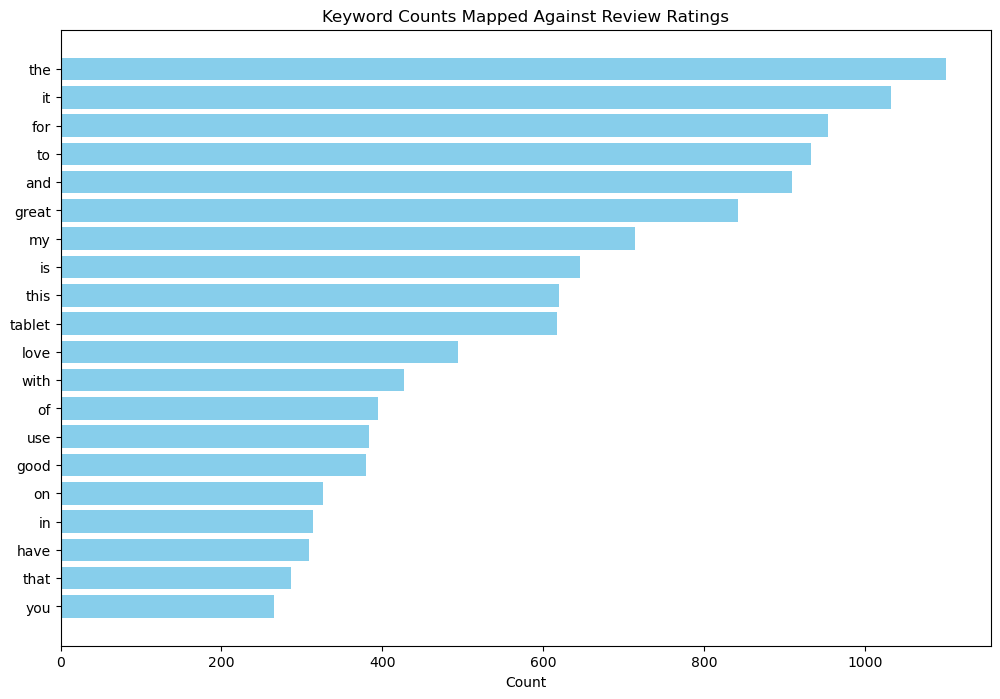

In [14]:


from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])


tfidf_scores = tfidf_matrix.sum(axis=0).A1
keywords = tfidf_vectorizer.get_feature_names_out()


keyword_counts = pd.DataFrame({'Keyword': keywords, 'Count': tfidf_scores})
keyword_counts = keyword_counts.sort_values(by='Count', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(keyword_counts['Keyword'], keyword_counts['Count'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.title("Keyword Counts Mapped Against Review Ratings")
plt.show()






**Analysis of Results**

* The generated bar plot displays the top keywords used in the reviews along with their respective counts. Words such as "the," "it," "to," and "and" are at the top, which might suggest that stop words were not fully filtered out.
* However, words like "tablet," "love," and "great" stand out as contextually relevant terms. These words indicate the core themes and sentiments of the reviews.

* Frequent stop words like "the," "it," and "to" appearing at the top could be due to their high occurrence in natural language. These words, while not directly insightful for review content, provide a base to understand linguistic structure.
* Contextually meaningful words such as "tablet," "love," and "great" indicate positive experiences or sentiments tied to specific aspects of the reviewed products.

The visualization effectively highlights the frequency distribution and enables a quick understanding of the key themes within the reviews.





# 5.4 Top 10 Most Common Words in Positive and Negative Reviews





**Positive Reviews**
* First, the positive reviews are isolated from the dataset by filtering reviews labeled as "Positive." Using the CountVectorizer from scikit-learn, the most frequently occurring words are extracted. The stop_words='english' parameter removes common English stop words (like "and," "the," etc.), ensuring that only meaningful words are considered. Additionally, the max_features=10 parameter ensures that only the top 10 words are captured based on their frequency.

* The result of the vectorization is a sparse matrix where each column represents a word and each row corresponds to a review. To get the total frequency of each word, the sparse matrix is converted to an array, and the sum of the word counts across all reviews is computed.

* The top 10 words and their frequencies are visualized using a horizontal bar plot. The green bars represent the frequency of each word, and the invert_yaxis() ensures that the most frequent words are displayed at the top.

**Negative Reviews**

* The same process is repeated for negative reviews. Reviews labeled as "Negative" are isolated, and the CountVectorizer is used to extract the top 10 words. The frequencies of these words are computed similarly by summing the word counts across all negative reviews.

* A separate horizontal bar plot is created to visualize the most common words in negative reviews. The red bars represent the frequency of each word, and the invert_yaxis() ensures that the most frequent words appear at the top.



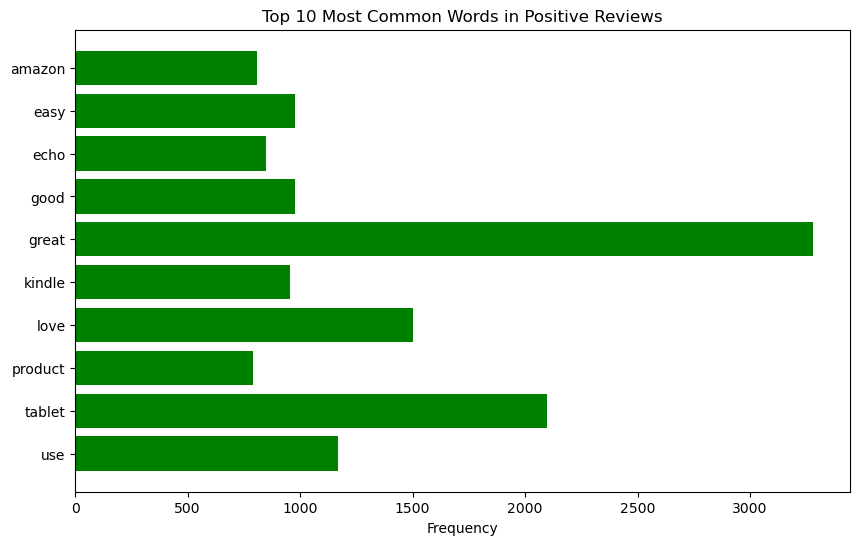

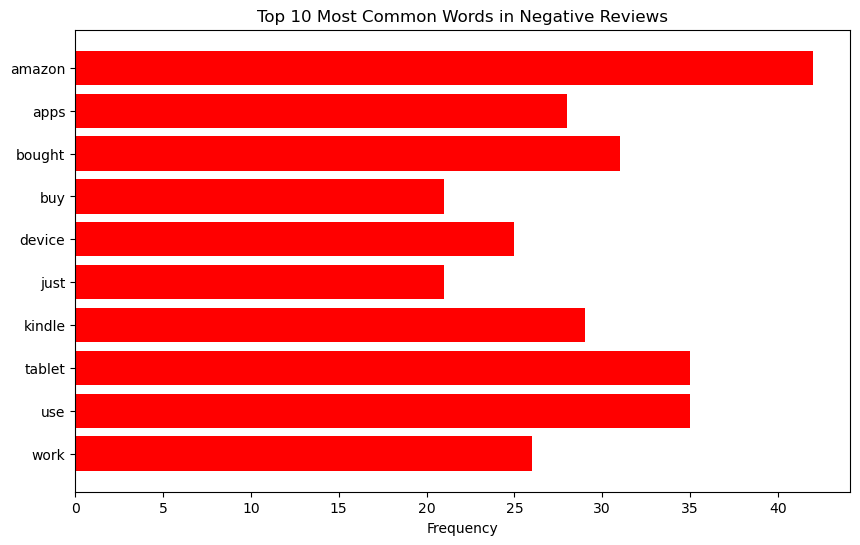

In [15]:



from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Filter positive and negative reviews
positive_reviews = data[data['sentiment'] == 'Positive']['combined_text']
negative_reviews = data[data['sentiment'] == 'Negative']['combined_text']

# Initialize CountVectorizer with additional stop words and bigram analysis
vectorizer = CountVectorizer(stop_words='english', max_features=10, ngram_range=(1, 2))  # Using bigrams (n-grams)

# Analyze Positive Reviews
positive_counts = vectorizer.fit_transform(positive_reviews)
positive_words = vectorizer.get_feature_names_out()
positive_word_counts = positive_counts.toarray().sum(axis=0)

# Visualize Top 10 Words in Positive Reviews
plt.figure(figsize=(10, 6))
plt.barh(positive_words, positive_word_counts, color='green')
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Positive Reviews")
plt.gca().invert_yaxis()
plt.show()

# Analyze Negative Reviews
negative_counts = vectorizer.fit_transform(negative_reviews)
negative_words = vectorizer.get_feature_names_out()
negative_word_counts = negative_counts.toarray().sum(axis=0)

# Visualize Top 10 Words in Negative Reviews
plt.figure(figsize=(10, 6))
plt.barh(negative_words, negative_word_counts, color='red')
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Negative Reviews")
plt.gca().invert_yaxis()
plt.show()






* The bar chart for positive reviews highlights the most common words or phrases (e.g., "great product" or "love" or "tablet") that appear in positive feedback. This helps identify what customers appreciate the most.
  
* Similarly, the bar chart for negative reviews surfaces common criticisms, providing actionable insights for improvement.
                                                                                                                                       
                                                                                                                                       



# Step 5.5: WordCloud for Positive and Negative Reviews





* The dataset is loaded into a DataFrame using the pandas library. This step involves reading a CSV file containing Amazon reviews and extracting the relevant data into a structured format. The columns retained for further analysis include reviews.rating, reviews.text, reviews.title, and reviews.doRecommend, which are important for understanding the review sentiments and the content of the reviews.

* Next, the review content is cleaned and preprocessed. To create a single unified text column, the main review text (reviews.text) is combined with the review title (reviews.title). Missing values in both columns are replaced with empty strings to ensure no errors occur during the concatenation. This combined text column, named combined_text, provides a holistic view of the review content, which is essential for generating word clouds.

* The column reviews.doRecommend, which indicates whether the reviewer recommended the product, is also cleaned. Any missing values in this column are replaced with 0 (indicating no recommendation) and converted to integers. This step ensures that the column is properly formatted for any future analysis that may require numerical values.

* The dataset then undergoes a transformation where the review ratings (reviews.rating) are converted into sentiment labels. Ratings of 4 or 5 are labeled as "Positive," a rating of 3 is labeled as "Neutral," and ratings of 1 or 2 are labeled as "Negative." This transformation is done using a custom function and applied to the entire dataset, creating a new column sentiment. This step simplifies the analysis by focusing on the sentiment polarity rather than numerical ratings.

* After this transformation, unnecessary columns are removed from the dataset. These include the original review text, title, recommendation status, and ratings. The cleaned dataset now contains only the essential columns, combined_text and sentiment, making it more streamlined and focused for generating word clouds.

* The process of generating word clouds begins with filtering the dataset based on sentiment labels. Positive reviews are extracted into one set, and negative reviews into another. The text content from each set is then concatenated into a single string for positive and negative reviews separately. This step ensures that the word cloud generation process can analyze all relevant text together, highlighting the most frequent words across all reviews of a specific sentiment.

* Word clouds are created using the WordCloud library, which visualizes the most common words in a given text. For positive reviews, the word cloud is generated with a white background and green color tones, representing positivity. It limits the visualization to the 100 most frequent words, ensuring clarity and focus. The resulting word cloud is displayed using matplotlib, where larger font sizes indicate higher word frequency.

* For negative reviews, a similar process is followed. The word cloud is created with a black background and red color tones to emphasize negativity. Again, the visualization is limited to the 100 most frequent words for readability. This visual contrast between positive and negative word clouds makes it easy to understand the overall sentiment trends in the reviews.

In summary, this process takes raw review data, cleans and transforms it into a structured format, encodes sentiments, and generates visual representations of word frequency for positive and negative reviews. The resulting word clouds provide a quick and intuitive understanding of the most commonly used words associated with each sentiment, offering valuable insights into customer opinions.

    

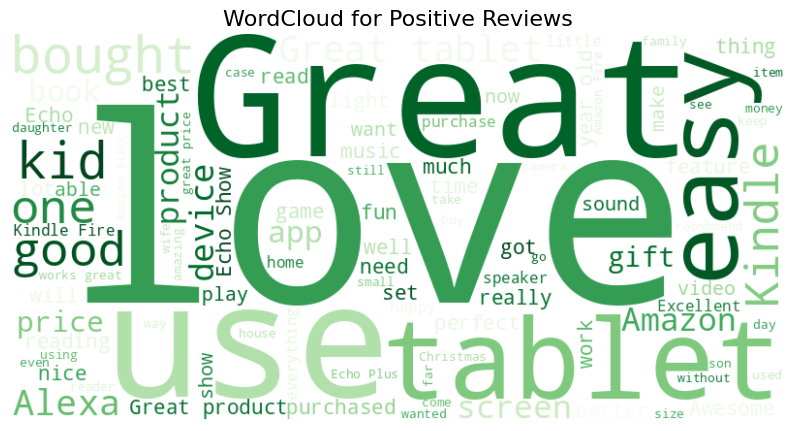

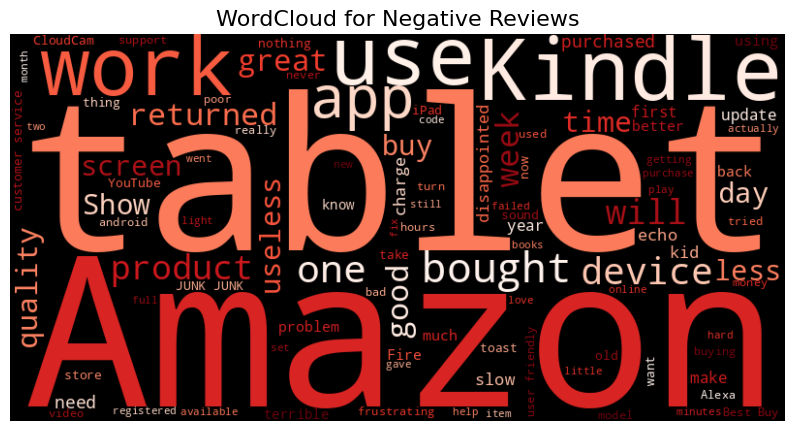

In [21]:





import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


file_path = 'dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'
data = pd.read_csv(file_path)


data = data[['reviews.rating', 'reviews.text', 'reviews.title', 'reviews.doRecommend']]


data['combined_text'] = data['reviews.text'].fillna('') + " " + data['reviews.title'].fillna('')


data['do_recommend'] = data['reviews.doRecommend'].fillna(0).astype(int)


data.drop(columns=['reviews.text', 'reviews.title', 'reviews.doRecommend'], inplace=True)


def encode_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['sentiment'] = data['reviews.rating'].apply(encode_sentiment)


data.drop(columns=['reviews.rating'], inplace=True)


positive_reviews = data[data['sentiment'] == 'Positive']['combined_text']
negative_reviews = data[data['sentiment'] == 'Negative']['combined_text']


positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)


plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='Greens'
).generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Positive Reviews", fontsize=16)
plt.show()


plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=100,
    colormap='Reds'
).generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Negative Reviews", fontsize=16)
plt.show()






The provided word clouds visualize the most frequently used words in positive and negative reviews from a dataset of Amazon product reviews. Each word's size corresponds to its frequency in the reviews, helping to quickly identify key themes or common sentiments.

**Word Cloud for Positive Reviews**:

* The word cloud for positive reviews is displayed in green and contains words that reflect favorable sentiments toward the products. The most prominent words include "Great," "Love," "Easy," "Use," and "Tablet." These words suggest that customers found the products convenient to use, enjoyable, and of good quality. Other frequent terms like "Good," "Kid," "Device," and "Alexa" highlight specific aspects or features of the products that customers appreciate. The frequent mention of terms like "Gift" and "Bought" indicates that many users purchased these items as gifts, further reinforcing the products' perceived value.

* This visualization indicates that the products resonate well with users, emphasizing ease of use, performance, and satisfaction. Positive terms and product-specific mentions help summarize the overall favorable perception.

**Word Cloud for Negative Reviews**:

* The word cloud for negative reviews, displayed in shades of red and black, contains words that reflect dissatisfaction or frustration. The largest terms, such as "Tablet," "Amazon," "Work," and "Kindle," suggest that specific products were central to users' complaints. Words like "Returned," "Disappointed," "Useless," and "Problem" indicate key pain points, including defective items, unmet expectations, and issues with functionality. Other words, such as "Screen," "Charge," and "Device," point to specific product features that caused dissatisfaction.

* The negative word cloud highlights recurring complaints and areas where products or services could improve. For example, frequent mentions of "Returned" or "Frustrating" suggest users experienced significant dissatisfaction, leading to product returns or negative feedback.

**Key Observations**:

* Themes: Positive reviews center around ease of use and product utility, while negative reviews highlight specific issues and frustrations.
* Prominent Terms: Both word clouds reveal the central role of specific products (like tablets or devices) in shaping user sentiment.
* Actionable Insights: By analyzing frequent terms in negative reviews, businesses can pinpoint areas for improvement, such as addressing complaints about screen quality or device functionality.
* Sentiment Analysis: Positive reviews emphasize customer satisfaction with features, while negative reviews focus on technical and usability issues.





While the keyword visualization (bar charts) highlights the most frequent words or phrases quantitatively, it lacks the visual intuitiveness of a word cloud. By combining this bar chart analysis with word clouds (as done earlier for positive and negative reviews), you can visually capture recurring themes and provide a more comprehensive understanding of the data. For example, word clouds can quickly show the dominant themes at a glance, while bar charts provide specific counts and rankings of the keywords.





Both visualizations serve at steps 5.4 and 5.5 different purposes and have distinct strengths, which can explain the perceived inconsistencies.

* A word cloud is a qualitative visualization tool designed to provide a quick and intuitive overview of the dominant themes in a textual dataset. The size of a word in a word cloud reflects its relative frequency but is not directly proportional to the exact numerical count. The word "Love" appearing larger than "Great" in the positive word cloud, even though "Great" has a higher frequency in the bar chart, might be due to the algorithm used to generate the word cloud. Some word cloud generation tools apply heuristics to balance word sizes and ensure visual appeal. Additionally, word clouds often give higher emphasis to recurring individual words but don’t necessarily reflect small numerical differences with perfect precision.

* On the other hand, a bar chart provides an accurate and quantitative representation of keyword frequencies. Each bar's height or length corresponds directly to the numerical count of a keyword in the dataset. In the positive reviews bar chart, "Great" has a longer bar than "Love," accurately reflecting its higher frequency in the dataset. Bar charts are thus more precise when comparing exact counts and are better suited for tasks requiring numerical specificity.

* The difference in representation stems from the design goals of these visual tools. Word clouds are visually engaging and ideal for showing broad patterns or dominant themes at a glance. However, they sacrifice precision in favor of aesthetic simplicity and are influenced by the layout algorithm. Bar charts, by contrast, prioritize precision and clarity in numerical comparisons, which makes them a better choice for detailed analysis.

It’s crucial to understand that these tools are complementary rather than contradictory. Word clouds excel at quickly highlighting prominent themes, while bar charts offer exact comparisons. In this case, the bar chart correctly shows "Great" being more frequent than "Love," while the word cloud provides a quick, visually appealing representation that might slightly overemphasize "Love" for aesthetic balance. This is a normal behavior based on the nature of these visualization tools and does not imply an error or inconsistency in the data.





# 5.6 Threshold-Performance Analysis





For models that output probabilities (e.g., predict_proba), the decision threshold is typically set to 0.5 by default. However, this threshold can be adjusted to optimize for specific metrics:

Lower thresholds classify more samples as positive, increasing recall but potentially decreasing precision.
Higher thresholds classify fewer samples as positive, increasing precision but potentially decreasing recall.





**Threshold Definition**:

* thresholds = np.linspace(0, 1, 100) generates 100 thresholds between 0 and 1.

**Metrics Calculation**:

* For each threshold, the probabilities are converted to binary predictions using y_pred = (y_pred_prob >= threshold).astype(int).
* Metrics such as Precision, Recall, F1-Score, and Accuracy are calculated for the positive class.
    
**Visualization**:

* The performance metrics are plotted as curves against the thresholds.
* A vertical line at threshold = 0.5 highlights the default threshold for comparison.

**Handling Models Without predict_proba**:

* Models like SVM with decision_function can be adapted, but models without probability output are skipped.



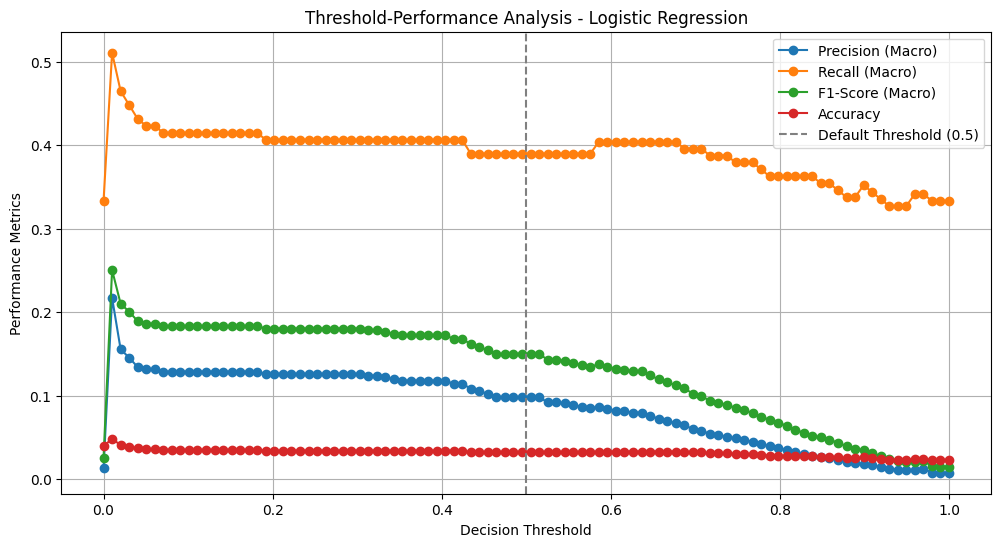

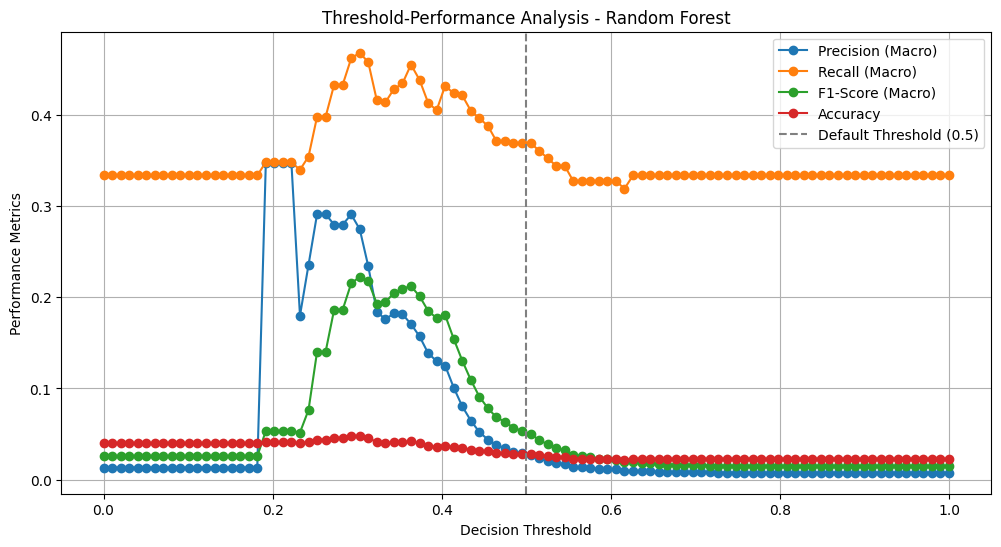

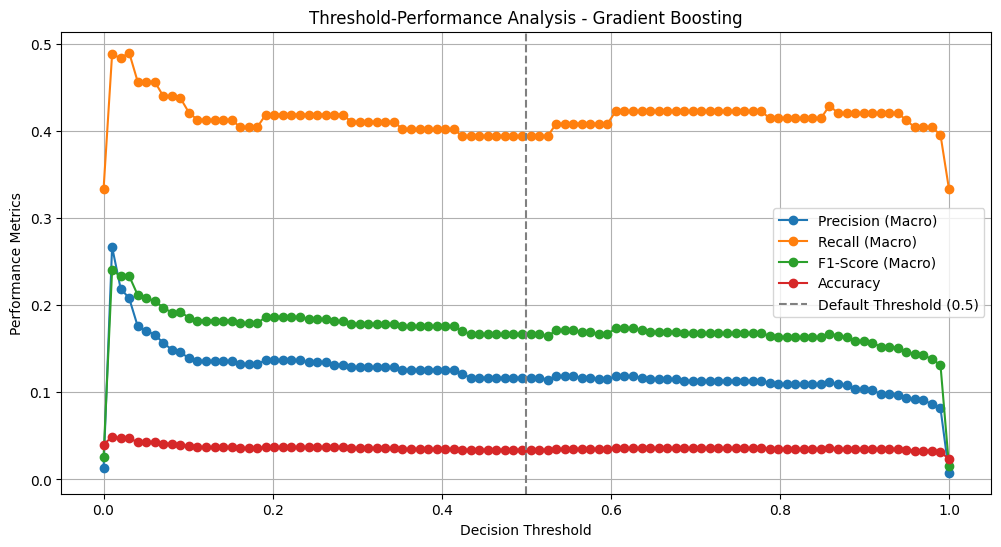

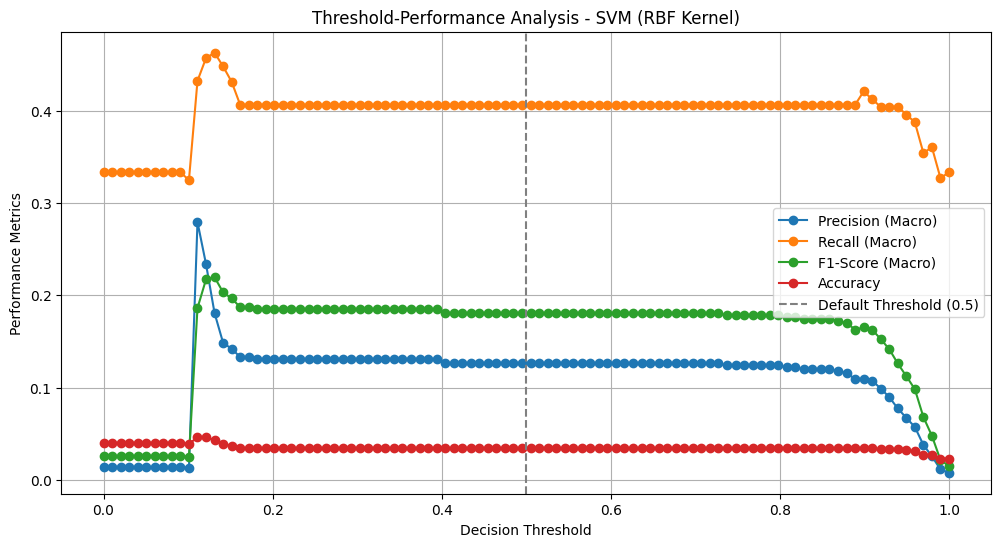

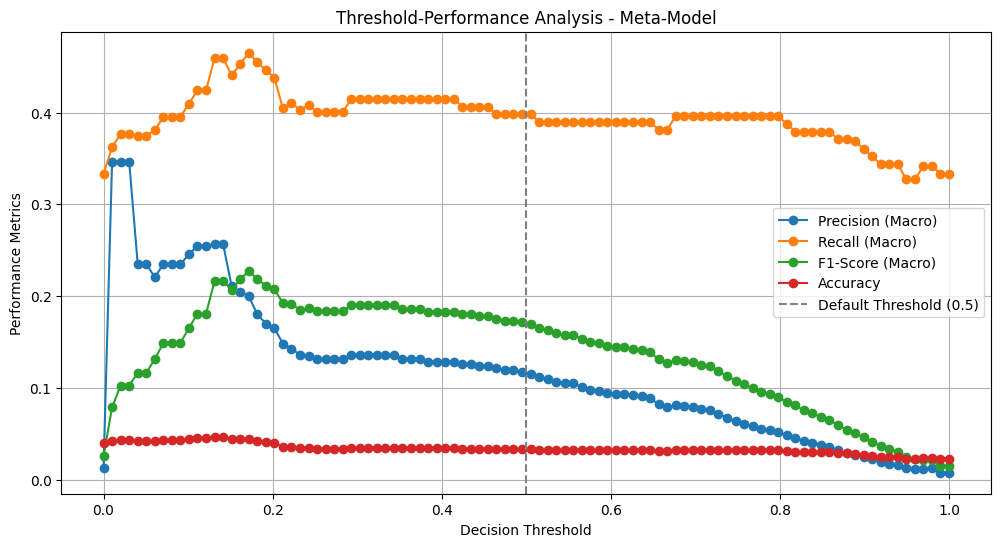

In [14]:




import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def plot_threshold_performance(model, X_test, y_test, positive_label, model_name):
    """Plots Precision, Recall, F1-Score, and Accuracy across decision thresholds."""
    if not hasattr(model, "predict_proba"):
        print(f"{model_name} does not support probability predictions. Skipping...")
        return


    y_pred_prob = model.predict_proba(X_test)[:, positive_label]
    

    thresholds = np.linspace(0, 1, 100)
    

    precisions, recalls, f1_scores, accuracies = [], [], [], []

    for threshold in thresholds:
        
        y_pred = (y_pred_prob >= threshold).astype(int)
        
       
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        accuracies.append(accuracy_score(y_test, y_pred))
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(thresholds, precisions, label="Precision (Macro)", marker='o')
    plt.plot(thresholds, recalls, label="Recall (Macro)", marker='o')
    plt.plot(thresholds, f1_scores, label="F1-Score (Macro)", marker='o')
    plt.plot(thresholds, accuracies, label="Accuracy", marker='o')
    plt.axvline(0.5, linestyle='--', color='gray', label="Default Threshold (0.5)")
    plt.title(f"Threshold-Performance Analysis - {model_name}")
    plt.xlabel("Decision Threshold")
    plt.ylabel("Performance Metrics")
    plt.legend()
    plt.grid()
    plt.show()



models = [log_reg, rf_balanced_subsample, gbc, svm, meta_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM (RBF Kernel)', 'Meta-Model']
positive_label = 2  

l
for model, name in zip(models, model_names):
    plot_threshold_performance(model, X_test_combined_dense, y_test_encoded, positive_label, name)










The "Threshold-Performance Analysis" plots generated for models like Gradient Boosting, Logistic Regression, Meta-Model, Random Forest, and SVM (RBF Kernel) provide valuable insights into how precision, recall, F1-score, and accuracy vary across decision thresholds. Here's a detailed explanation of the generated plots and why some models, like Naive Bayes and Easy Ensemble, cannot develop similar visualizations:

**Explanation of the Generated Threshold-Performance Analysis Plots**:

* Precision (Blue Line):

  * Precision is the ratio of true positives to the sum of true and false positives. As the decision threshold increases, precision generally improves because only high-confidence predictions are considered positive. However, fewer positives are identified at high thresholds, which can result in fewer false positives.

* Recall (Orange Line):

  * Recall measures the ratio of true positives to the total actual positives. It decreases with increasing thresholds because many true positives are excluded when only high-confidence predictions are considered.

* F1-Score (Green Line):

  * F1-score is the harmonic mean of precision and recall. It provides a balanced metric, considering both false positives and false negatives. The F1 score usually peaks at a threshold that balances precision and recall.
    
* Accuracy (Red Line):

  * Accuracy measures the overall correctness of predictions. It generally remains more stable compared to precision, recall, and F1-score because it accounts for both true positives and true negatives.
    
* Default Threshold (Dashed Line):

  * The default threshold of 0.5 is marked to show the performance at the commonly used decision threshold.
    
**Why Naive Bayes and Easy Ensemble Models Cannot Generate This Visualization**:

1. Naive Bayes:
* Naive Bayes models inherently use probabilistic calculations and produce class probabilities. However: They assume strong feature independence, which might limit their ability to vary predictions meaningfully with thresholds. While Naive Bayes can theoretically generate precision-recall or threshold-performance plots, its probabilistic outputs are often less sensitive to decision thresholds compared to other models like SVM or Gradient Boosting.
2. Easy Ensemble:
* Easy Ensemble is an ensemble model designed for imbalanced datasets. It combines predictions from multiple weak learners (typically decision trees).

**Challenges include**:
* Difficulty in directly extracting threshold-specific performance metrics because it aggregates predictions across multiple base learners.
* This aggregation makes it challenging to vary performance metrics based on decision thresholds.
  
**Observations from Plots**:

* Gradient Boosting:

  * Shows smooth transitions in metrics, reflecting its robust handling of complex patterns in the data.
    
* Logistic Regression:

  * The metrics change relatively smoothly, as logistic regression is a linear model with probabilistic outputs.
    
* Meta-Model:

  * As an ensemble model, its performance depends on the base models. Metrics show variability as the decision threshold changes.
    
* Random Forest:

  * Shows more abrupt changes in precision and recall, likely due to the discrete nature of decision tree outputs.
    
* SVM (RBF Kernel):

  * Produces smoother curves, as it calculates a continuous decision function for class probabilities.




